## Assignment 2: Time Series Forecasting

### \<Zuxing Wu> \<a1816653>

#### Follow detail instructions in the assignment specification and use these heading for implementation and discussion

In [102]:
# All imports
# pip install pandas matplotlib seaborn statsmodels
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates
import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf

### 1. Read the dataset

In [103]:
# Read the dataset
df = pd.read_csv('energydata_complete.csv')

In [104]:
df.head()
# data was collected every 10 minutes

date  Appliances  lights     T1       RH_1    T2       RH_2   
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000  \
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg   
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5  \
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

In [105]:
df.shape

(19735, 29)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

All data are non-null. Good.

### 2. Analyse and visualise the data

In [107]:
# basic data analysis
print(df.describe())
# date is not shown below

         Appliances        lights            T1          RH_1            T2   
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000  \
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4   
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000  \
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576    

In [108]:
# Convert the 'date' column to datetime if it's not already
df['date'] = pd.to_datetime(df['date'])

# Get the min and max date
min_date = df['date'].min()
max_date = df['date'].max()

print(f'Date range: {min_date} to {max_date}')

Date range: 2016-01-11 17:00:00 to 2016-05-27 18:00:00


4 months and 16 days long, which means we can find a yearly pattern or seasonal pattern.

In [109]:
print(df.describe())
# now 'date' is shown

                      date    Appliances        lights            T1   
count                19735  19735.000000  19735.000000  19735.000000  \
mean   2016-03-20 05:30:00     97.694958      3.801875     21.686571   
min    2016-01-11 17:00:00     10.000000      0.000000     16.790000   
25%    2016-02-14 23:15:00     50.000000      0.000000     20.760000   
50%    2016-03-20 05:30:00     60.000000      0.000000     21.600000   
75%    2016-04-23 11:45:00    100.000000      0.000000     22.600000   
max    2016-05-27 18:00:00   1080.000000     70.000000     26.260000   
std                    NaN    102.524891      7.935988      1.606066   

               RH_1            T2          RH_2            T3          RH_3   
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000  \
mean      40.259739     20.341219     40.420420     22.267611     39.242500   
min       27.023333     16.100000     20.463333     17.200000     28.766667   
25%       37.333333     18.790000  

rv1, rv2 are just numbers range from 0.0 to 50.0. Useless

In [110]:
df.info()
# date is datetime64[ns] now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

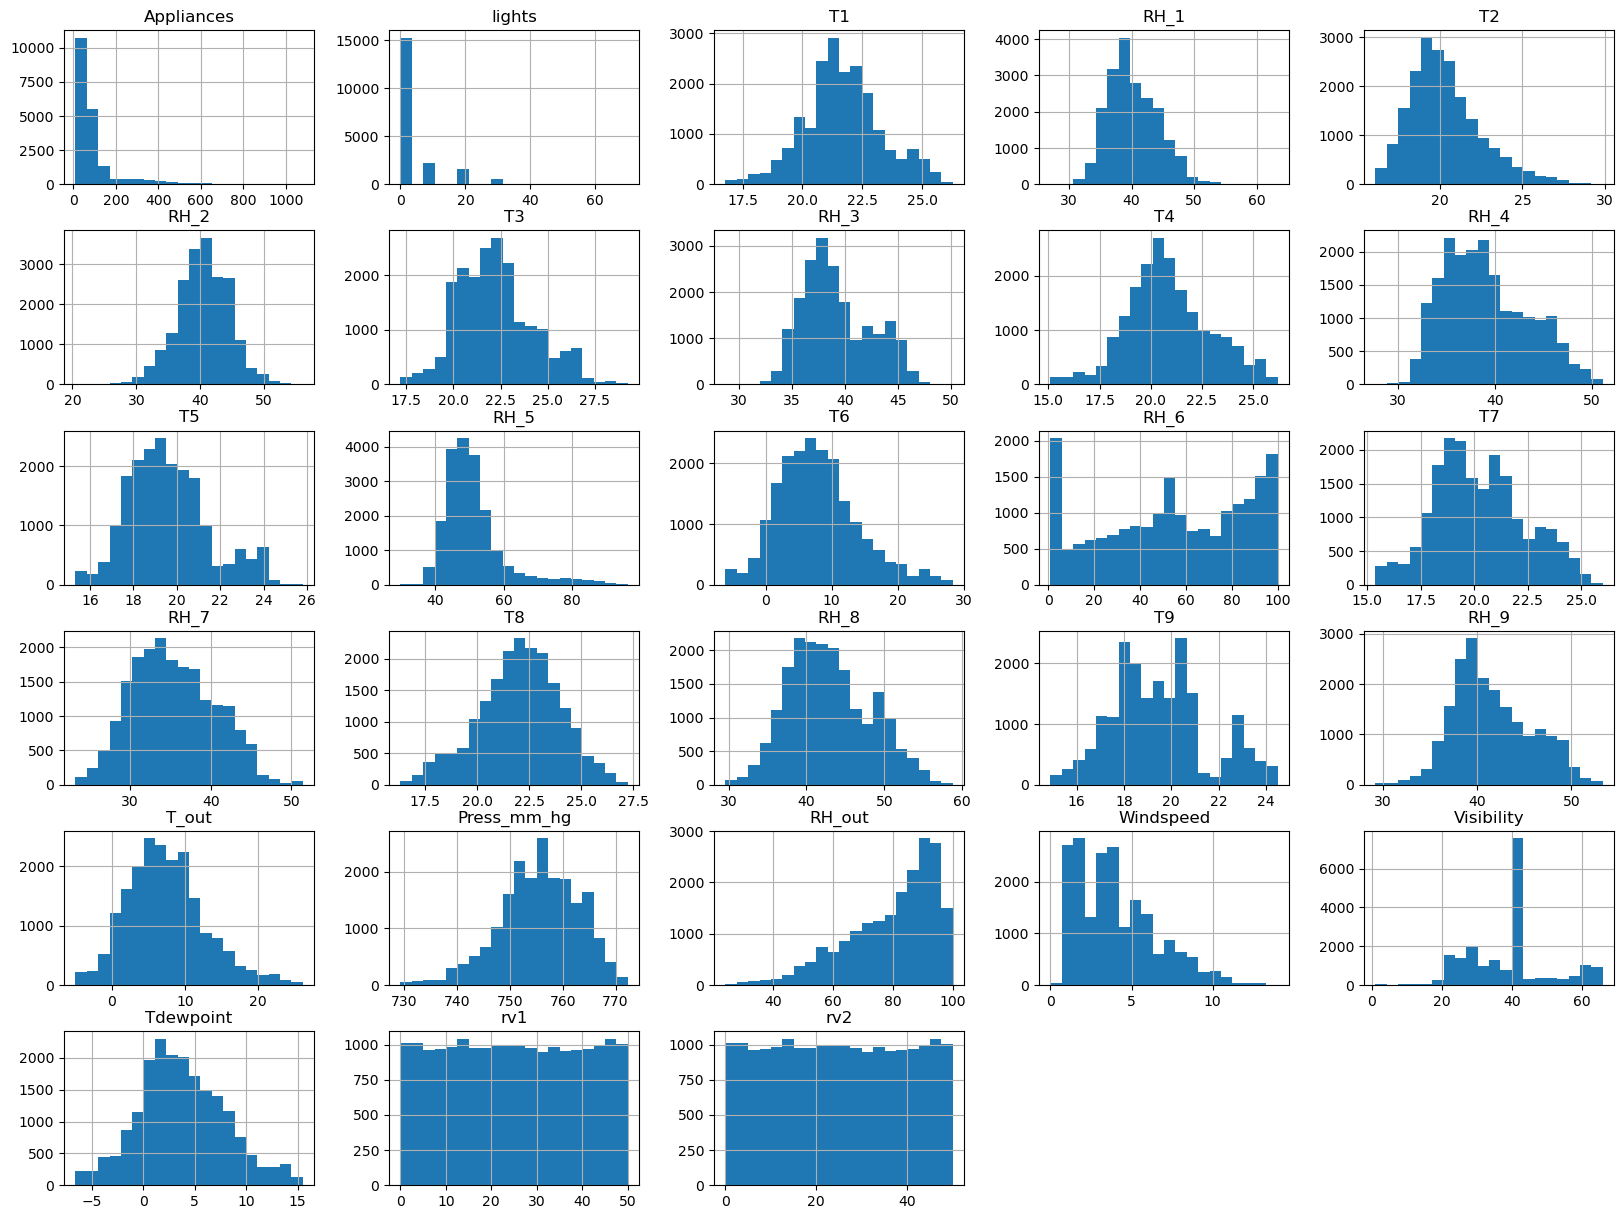

In [111]:
# data visualization
# Histogram of all numerical columns
df.set_index('date', inplace=True)
df.hist(bins=20, figsize=(20, 15))
plt.show()
# have a look at the trend of every column, but seems not very useful

In [112]:
df.drop(['rv1', 'rv2'], axis=1, inplace=True)
# drop rv1 and rv2 columns, they are random variables

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9         

From plots above, I think I should put plots of same data type together for comparison.

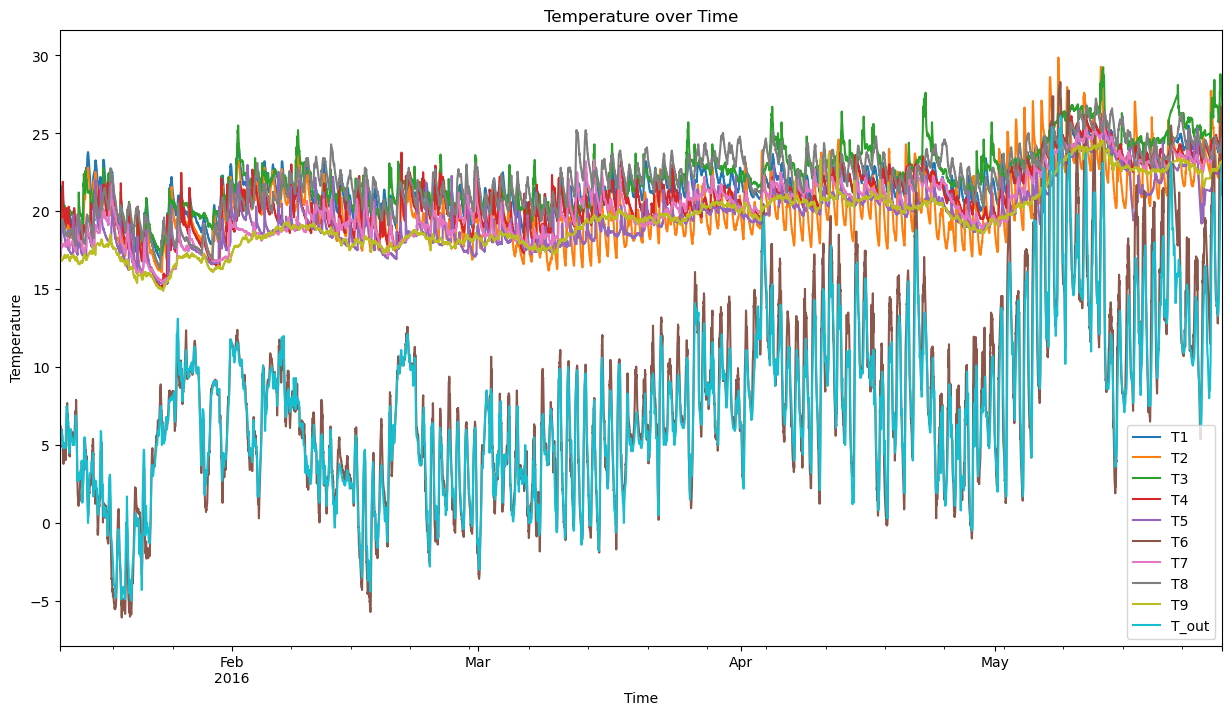

In [114]:
# Select columns of temperature
temp_df = df[['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T_out']]
# temp_df.set_index('date', inplace=True)
# Plot the temperature columns
temp_df.plot(kind='line', figsize=(15, 8))

plt.title('Temperature over Time')
plt.ylabel('Temperature')
plt.xlabel('Time')
plt.show()

T6, Temperature outside the building (north side).  
T_out, Temperature outside (from Chievres weather station).  
It makes sense that they're colder than others. Maybe I should only compare inside temperatures.

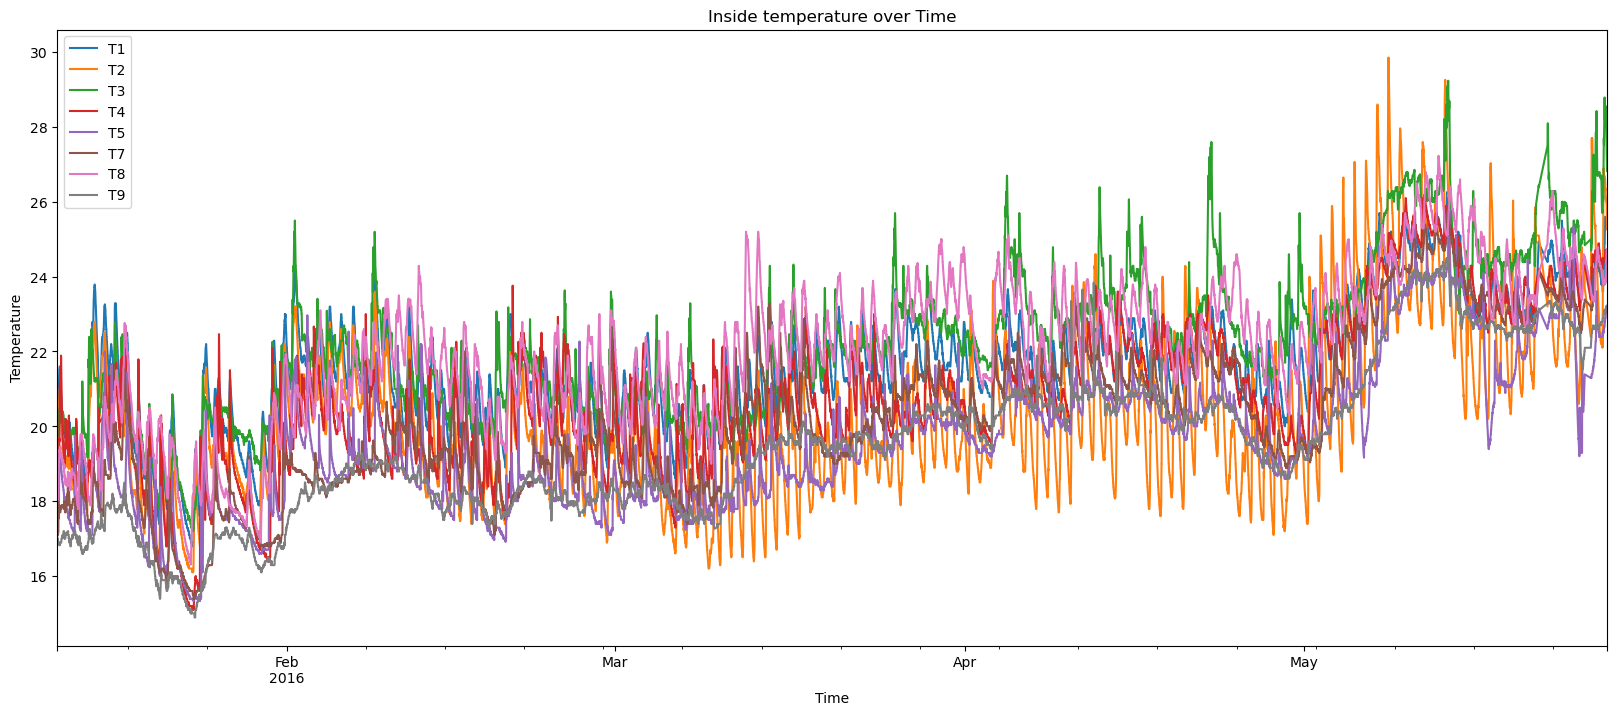

In [115]:
# Select columns of Inside temperature
temp_df = temp_df.drop(['T_out', 'T6'], axis=1)
# Plot the temperature columns
temp_df.plot(kind='line', figsize=(20, 8))

plt.title('Inside temperature over Time')
plt.ylabel('Temperature')
plt.xlabel('Time')
plt.show()

Their values are different, but their trends are almost smimilar. They are slowly going up.  
Now, I want to see the trends in all humidities.

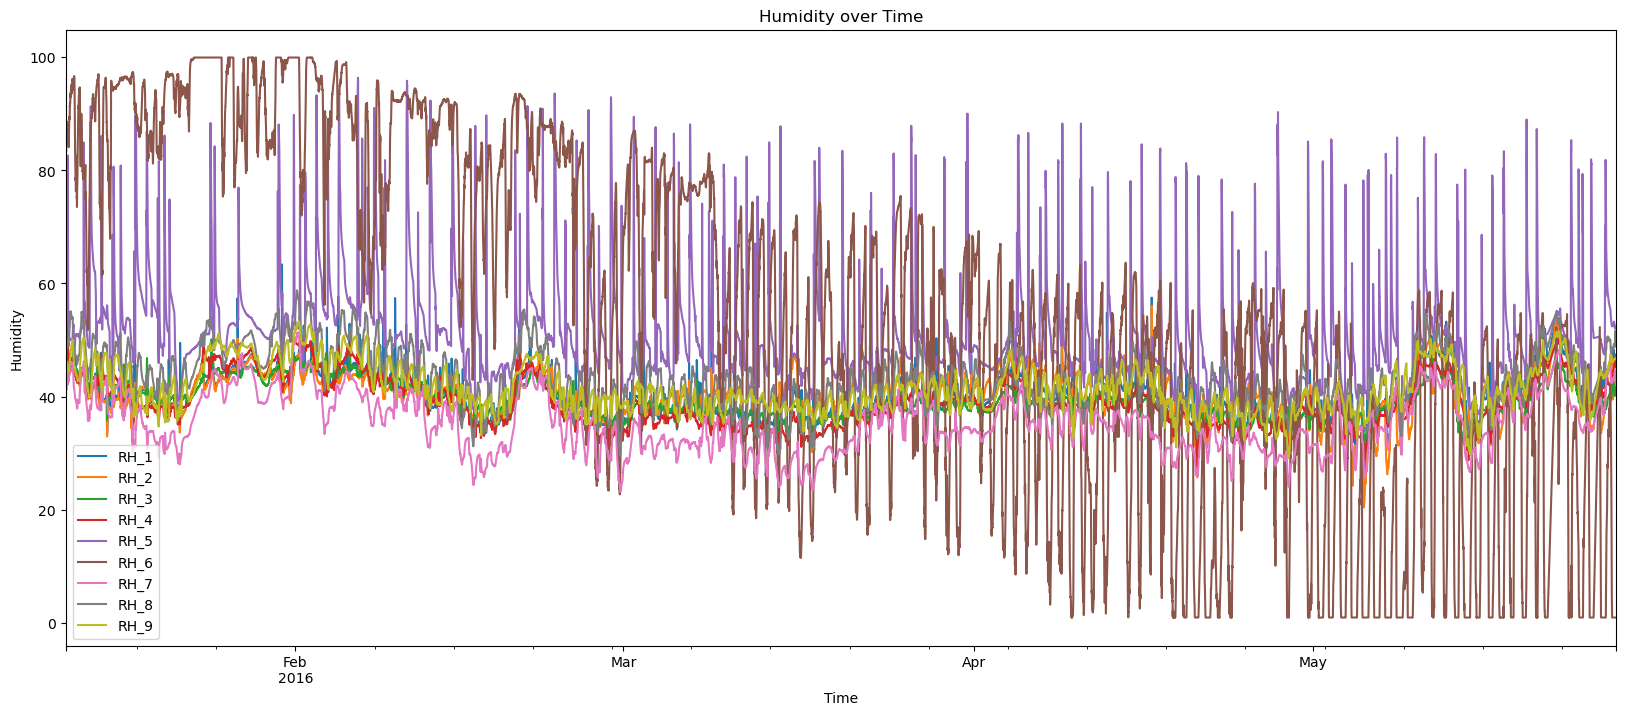

In [116]:
# pick the columns of humidity, except RH_out
hum_df = df[['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9']]
# hum_df.set_index('date', inplace=True)
# Plot the humidity columns
hum_df.plot(kind='line', figsize=(20, 8))

plt.title('Humidity over Time')
plt.ylabel('Humidity')
plt.xlabel('Time')
plt.show()

Why RH_5, RH_6 are so jumpy? Because RH_5 is humidity in bathroom, and RH_6 is humidity outside the building.  
I should exclude them.

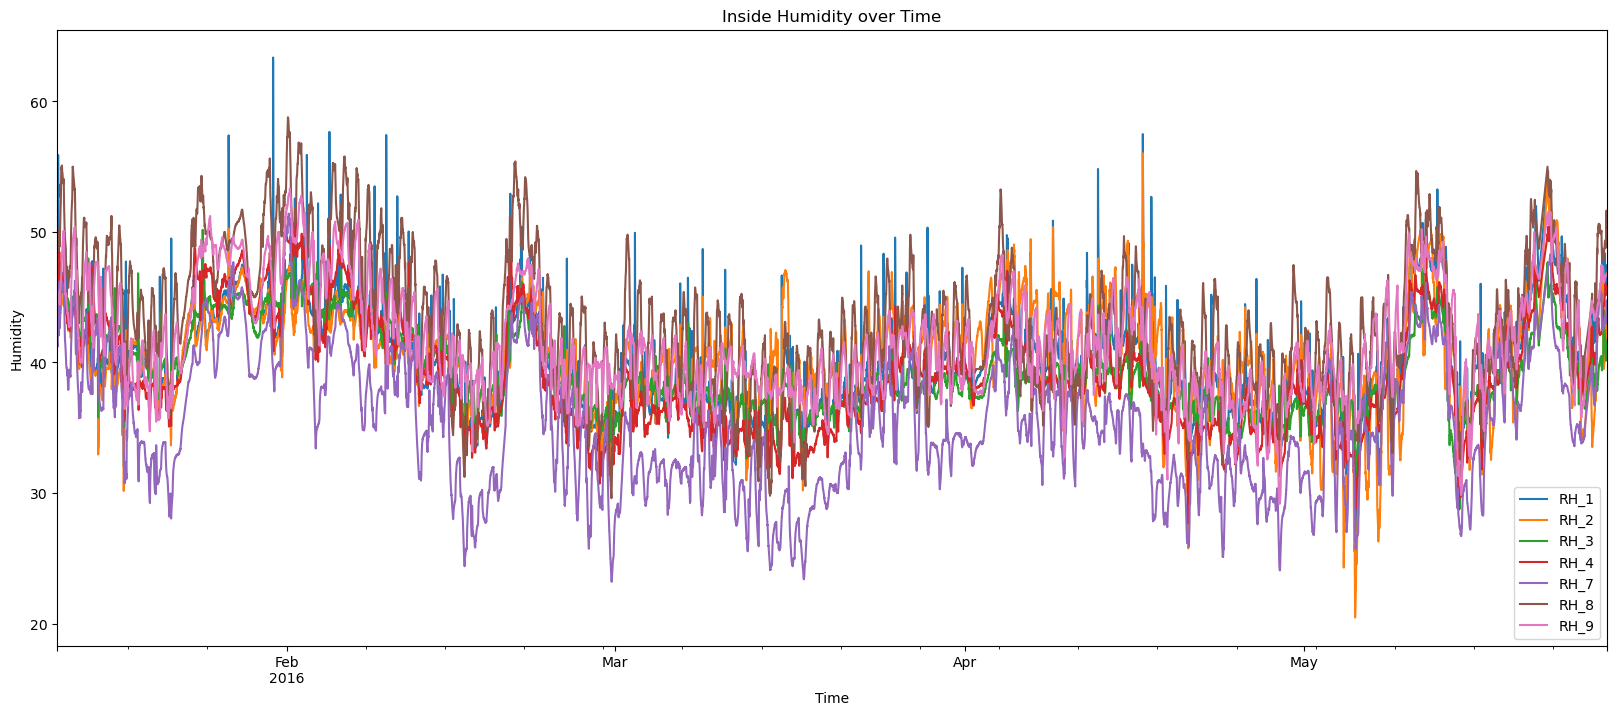

In [117]:
# pick the columns of inside humidity
hum_df = hum_df.drop(['RH_5', 'RH_6'], axis=1)
# Plot the humidity columns
hum_df.plot(kind='line', figsize=(20, 8))

plt.title('Inside Humidity over Time')
plt.ylabel('Humidity')
plt.xlabel('Time')
plt.show()

Now, we can see the general trends of every humidity column are similar.  
RH_7, humidity in ironing room is relative lower than other places, which makes sense.  
RH_1, humidity in kitchen sometimes is the highest in the house because of cooking? I guess. It makes sense too.

Some columns show the data from Chievres weather station. I don't doubt their accuracy, But I am not sure whether they are correlated to the energy consumption of the house.  
To be specific, I'm not sure I can use them as features for predicting future energy use.

So far, I think I should analysis the correlation between them.

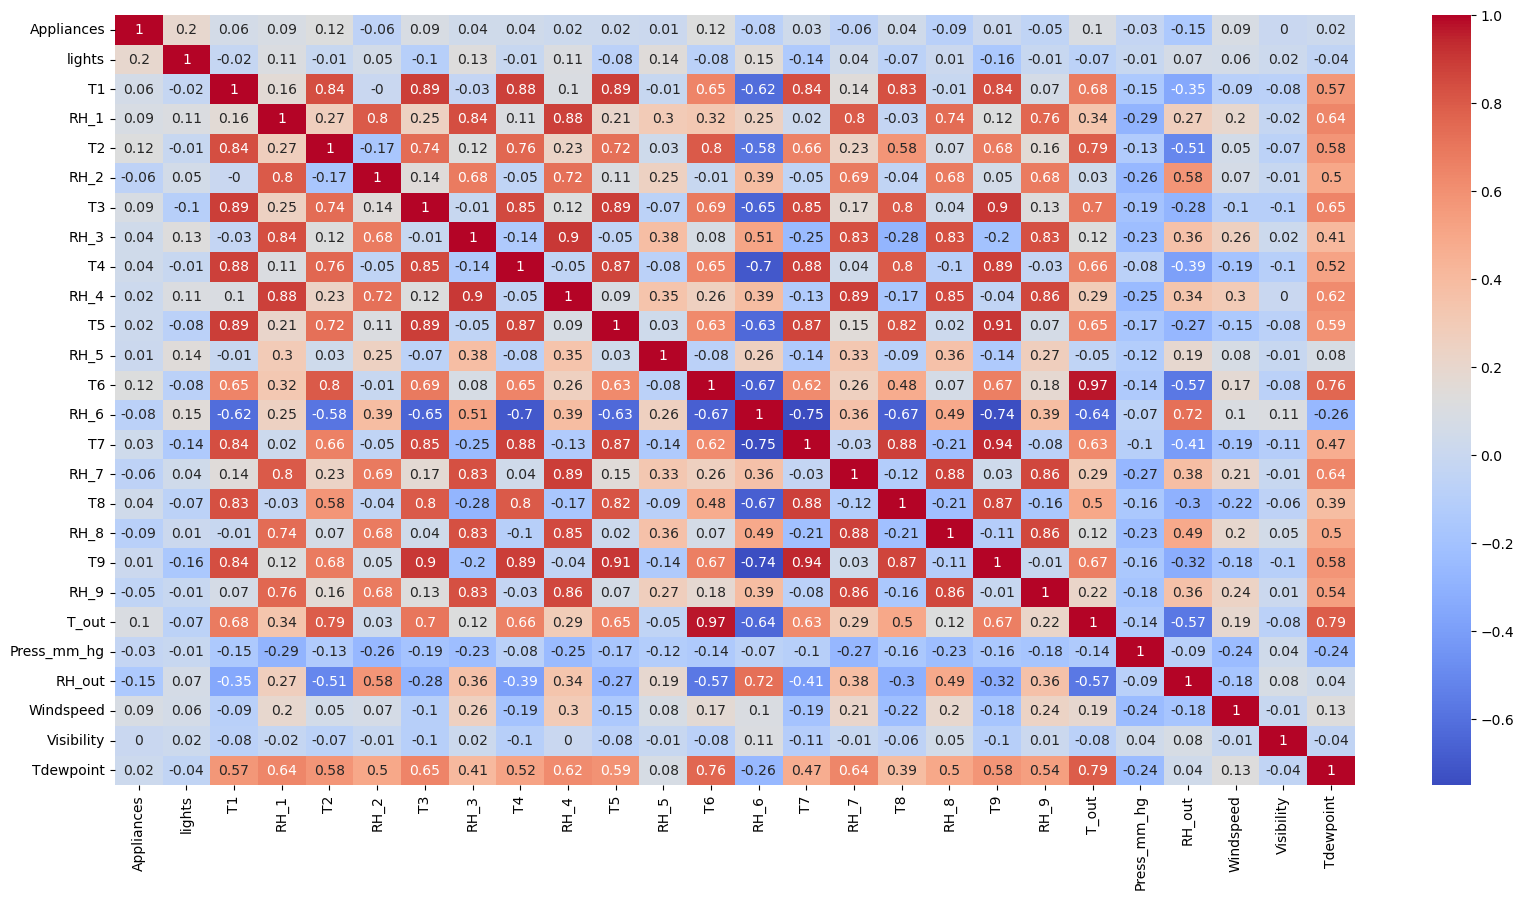

In [118]:
# Select only numeric columns for correlation, date excluded
numeric_cols = df.select_dtypes(include=[np.number])

plt.figure(figsize=(20, 10))
sns.heatmap(numeric_cols.corr().round(2), annot=True, cmap='coolwarm')
plt.show()

From the heatmap above, I found **lights, T2, T6, T_out, Windspeed** are relatively higher related to the enerygy uses of Appliances.  
**RH_out** is also obviously negatively correlated.  

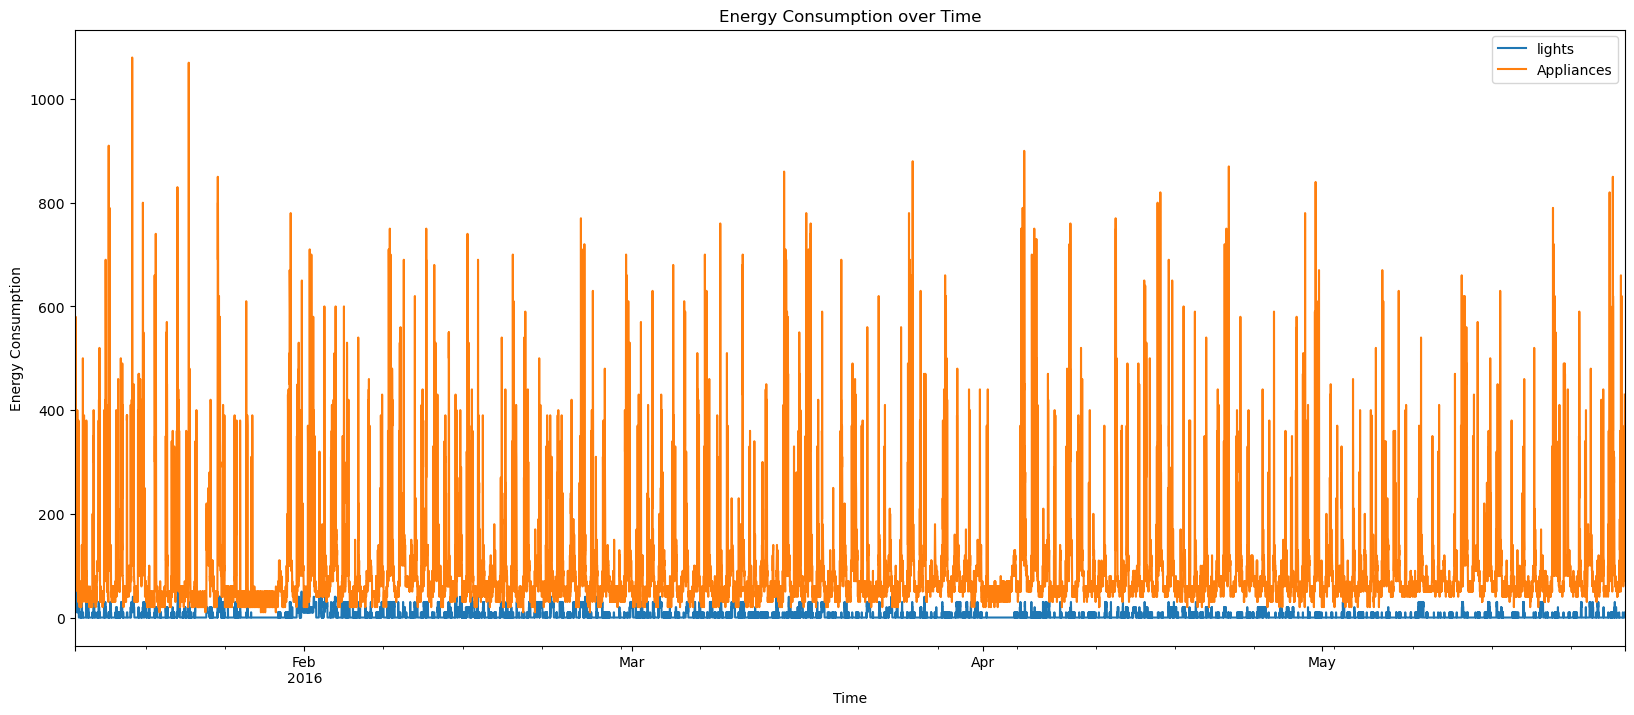

In [119]:
# show lights and energy consumption over time
energy_df = df[['lights', 'Appliances']]
# energy_df.set_index('date', inplace=True)
# Plot the energy columns
energy_df.plot(kind='line', figsize=(20, 8))

plt.title('Energy Consumption over Time')
plt.ylabel('Energy Consumption')
plt.xlabel('Time')
plt.show()
# lights enery use is just a part of total appliances consumption
# I can't see any trend from this line plot

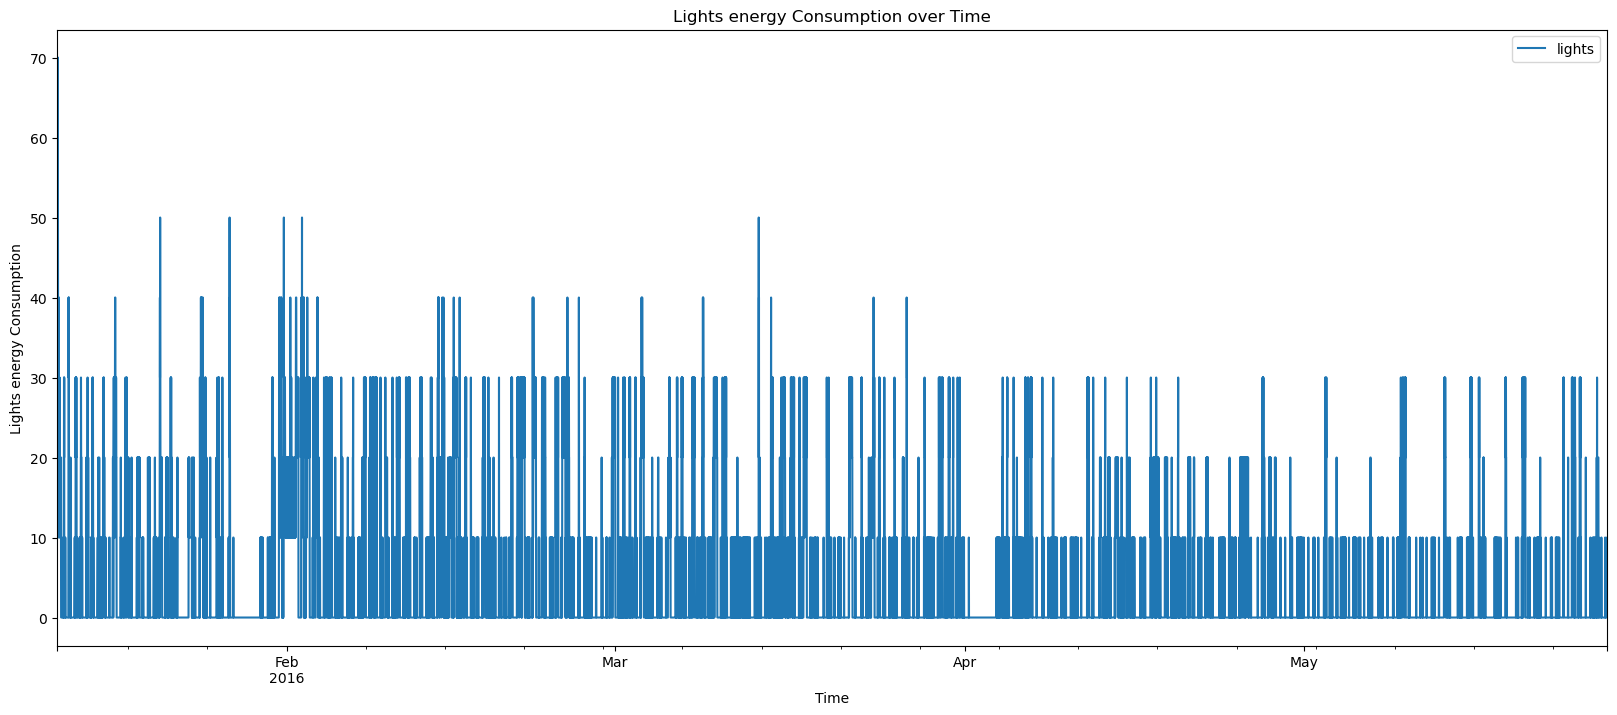

In [120]:
# show lights consumption over time
energy_df = df[['lights']]
# energy_df.set_index('date', inplace=True)
# Plot the energy columns
energy_df.plot(kind='line', figsize=(20, 8))

plt.title('Lights energy Consumption over Time')
plt.ylabel('Lights energy Consumption')
plt.xlabel('Time')
plt.show()
# Their power rate is fixed, so the energy consumption is related to the time they are on

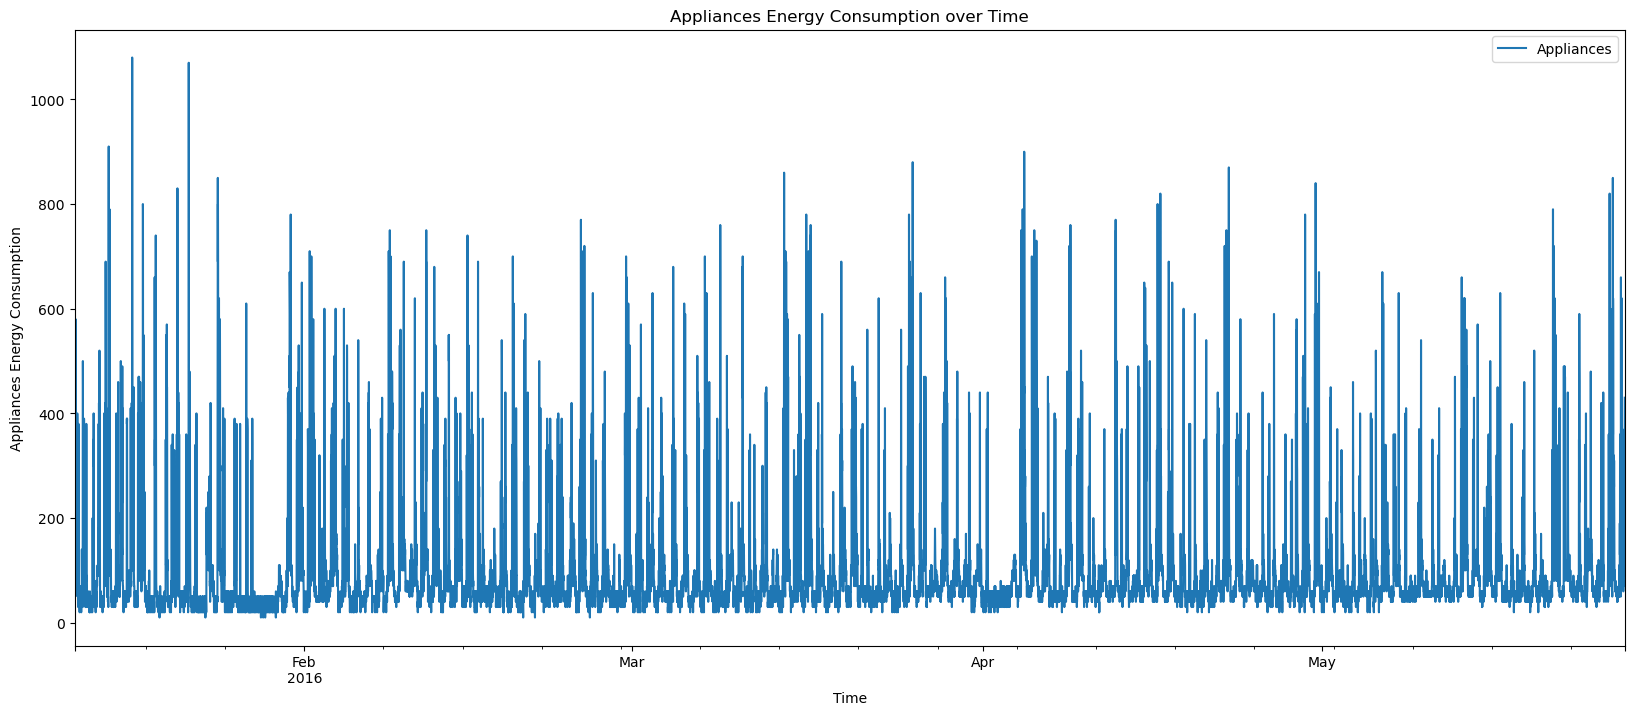

In [121]:
# show total energy consumption over time
energy_df = df[['Appliances']]
# energy_df.set_index('date', inplace=True)
# Plot the energy columns
energy_df.plot(kind='line', figsize=(20, 8))

plt.title('Appliances Energy Consumption over Time')
plt.ylabel('Appliances Energy Consumption')
plt.xlabel('Time')
plt.show()

I can only find that a small period time before Feb and after Apr shows low energy consumption in both lights plot and all Appliances plot.  
For now, I still can't find a pattern or a cycle. There should be a daily/weekly/monthly pattern hiding in it.  
I might as well take a sample of one day, or one whole week, or one whole month.

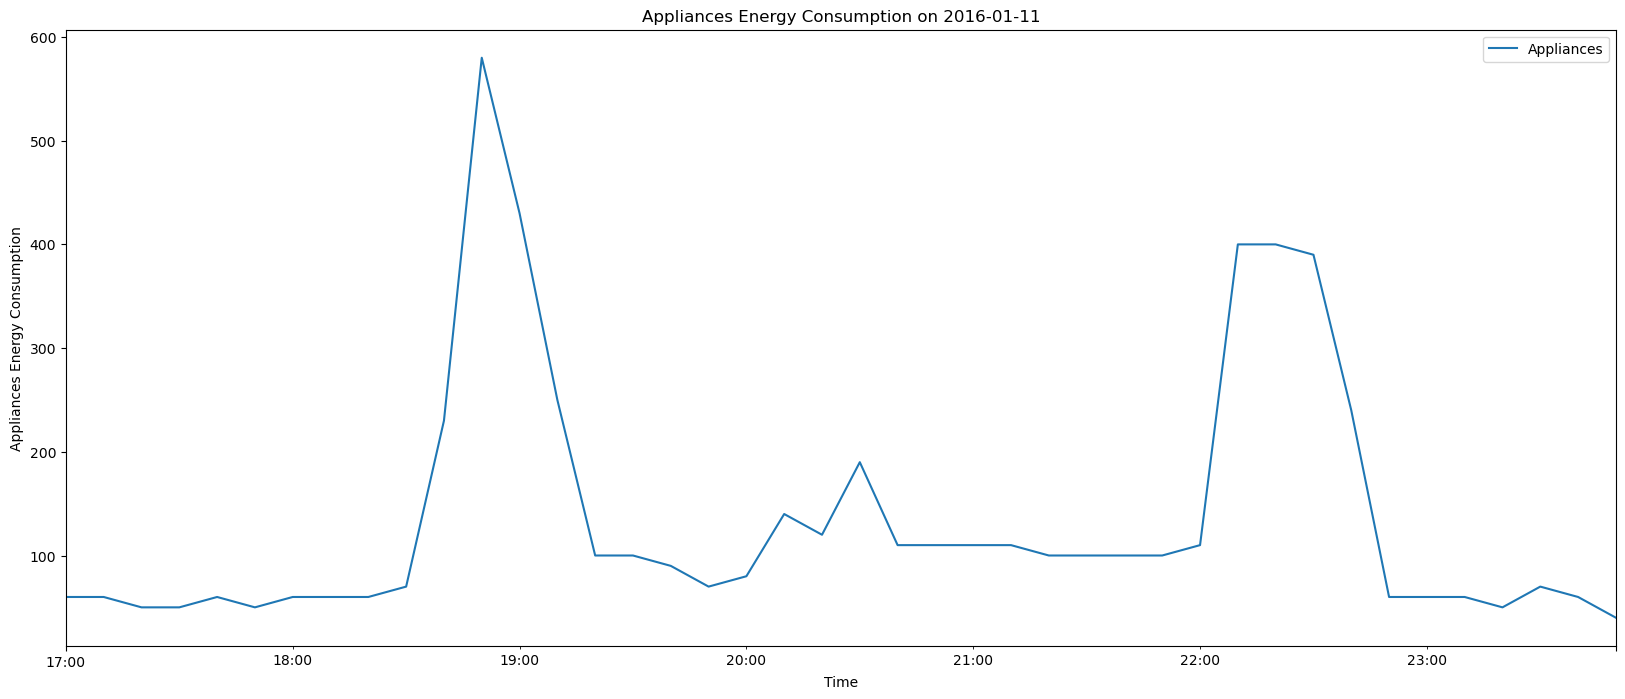

In [122]:
# show appliances energy consumption in one day
energy_df = df[['Appliances']]

energy_df = energy_df.loc['2016-01-11']
# Plot the energy columns
energy_df.plot(kind='line', figsize=(20, 8))

plt.title('Appliances Energy Consumption on 2016-01-11')
plt.ylabel('Appliances Energy Consumption')
plt.xlabel('Time')
plt.show()
# 2016-01-11 is the first day of the whole dataset, and it starts from 17:00, not complete

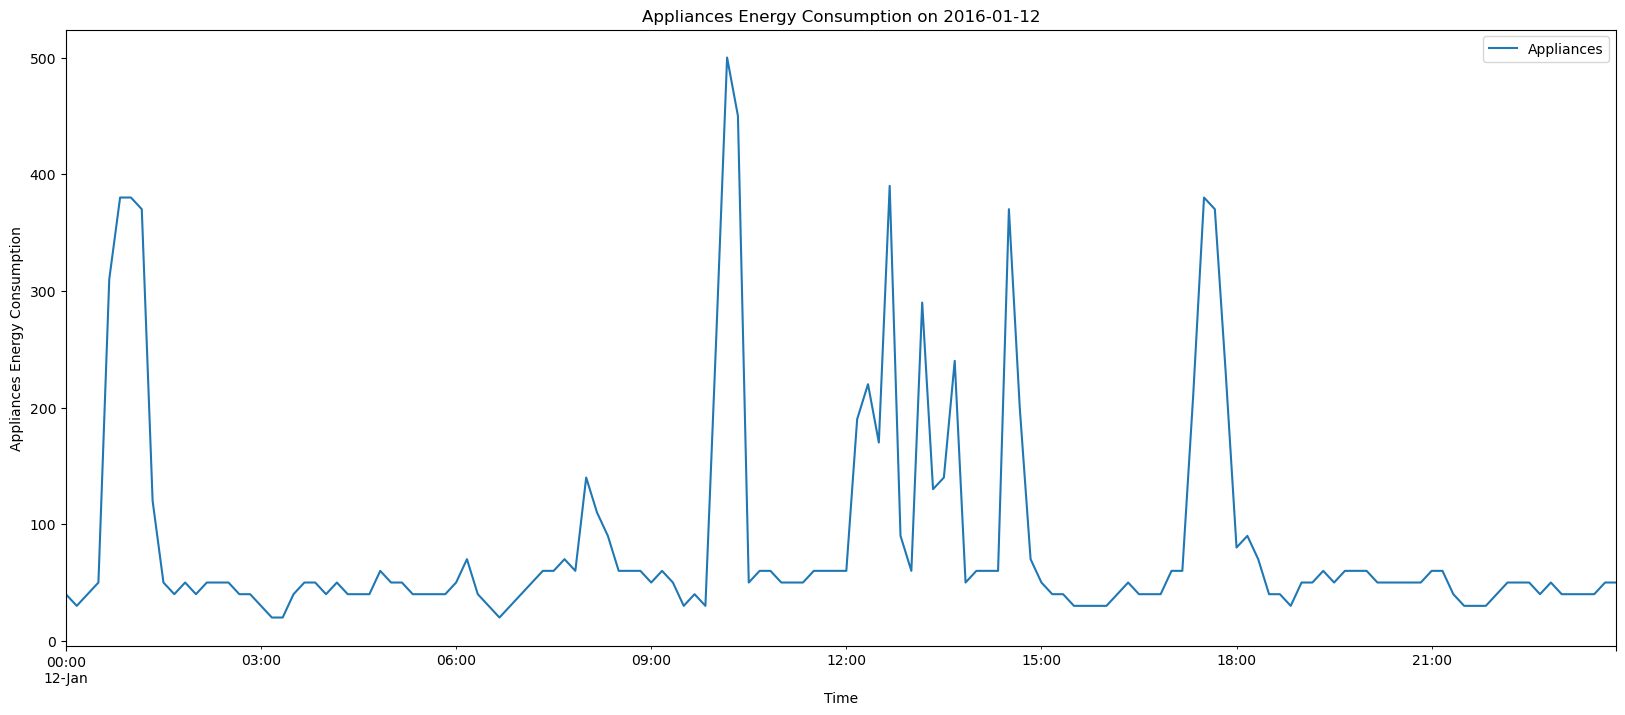

In [123]:
# show appliances energy consumption in one day
energy_df = df[['Appliances']]

energy_df = energy_df.loc['2016-01-12']
# Plot the energy columns
energy_df.plot(kind='line', figsize=(20, 8))

plt.title('Appliances Energy Consumption on 2016-01-12')
plt.ylabel('Appliances Energy Consumption')
plt.xlabel('Time')
plt.show()

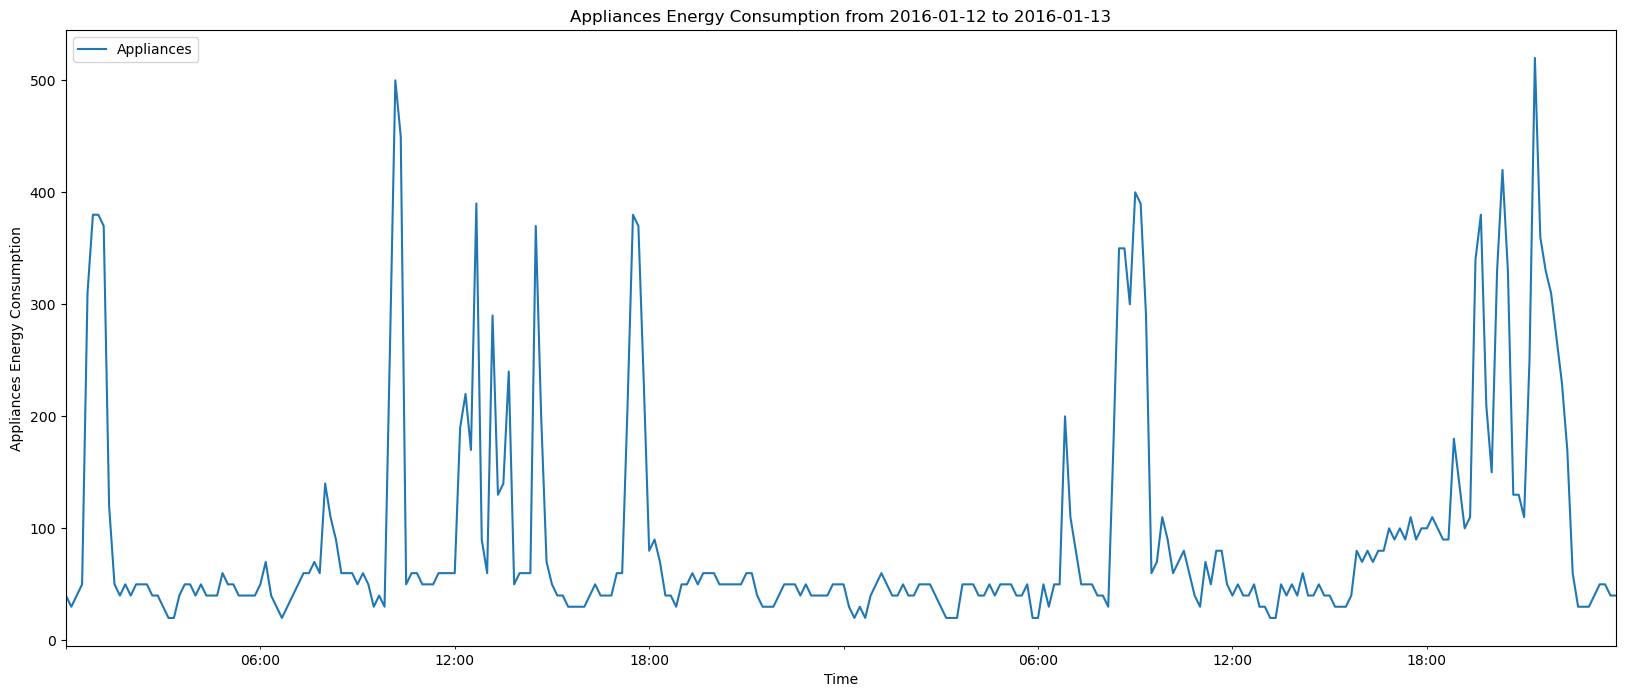

In [124]:
# show appliances energy consumption in 2 days
start_date = '2016-01-12'
end_date = '2016-01-14'
energy_df = df[['Appliances']]

mask = (energy_df.index >= start_date) & (energy_df.index < end_date)
energy_df = energy_df.loc[mask]
# Plot the energy columns
energy_df.plot(kind='line', figsize=(20, 8))

# # Format the x-axis to show more specific time
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # interval = 1 hours

plt.title('Appliances Energy Consumption from 2016-01-12 to 2016-01-13')
plt.ylabel('Appliances Energy Consumption')
plt.xlabel('Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()
# It doesn't show every hour on X-asix. I need to fix it

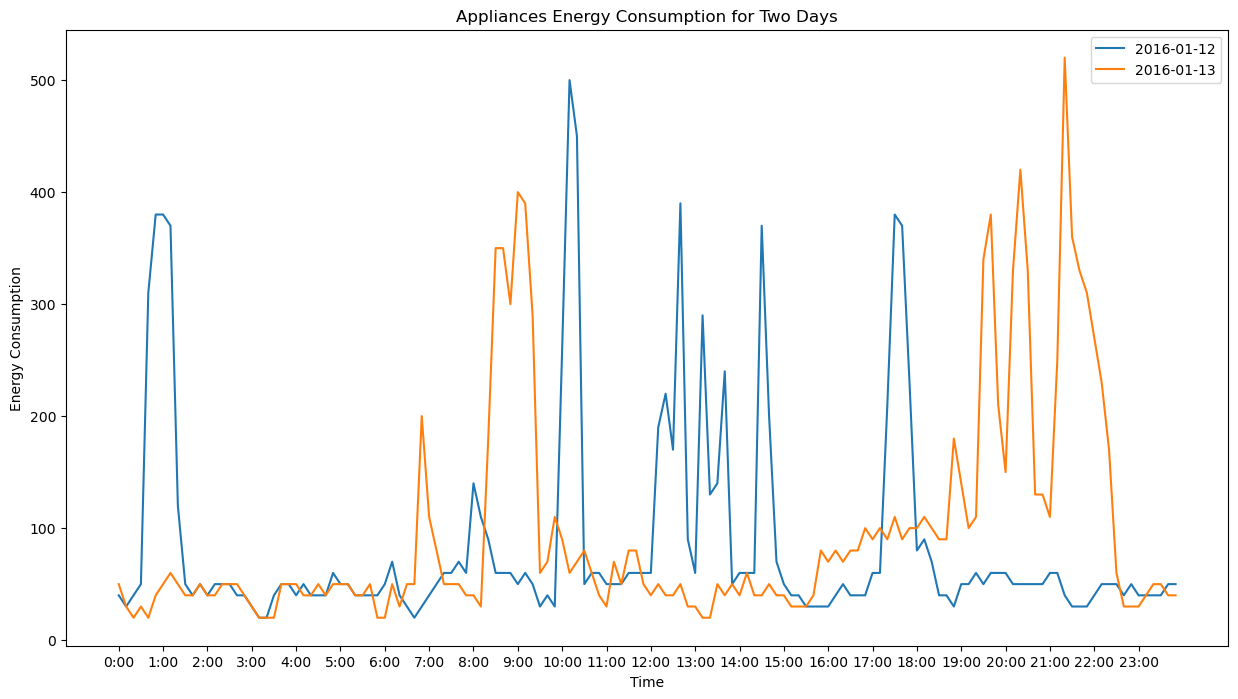

In [125]:
# Select the first day
start_date1 = '2016-01-12'
end_date1 = '2016-01-13'
mask1 = (energy_df.index >= start_date1) & (energy_df.index < end_date1)
df_day1 = energy_df.loc[mask1]

# Select the second day
start_date2 = '2016-01-13'
end_date2 = '2016-01-14'
mask2 = (energy_df.index >= start_date2) & (energy_df.index < end_date2)
df_day2 = energy_df.loc[mask2]

# Select the first day and only keep the time
df_day1.index = df_day1.index.time
df_day1['Appliances'].plot(kind='line', figsize=(15, 8), label='2016-01-12')

# Select the second day and only keep the time
df_day2.index = df_day2.index.time
df_day2['Appliances'].plot(kind='line', figsize=(15, 8), label='2016-01-13')

# Set xticks to every hour
plt.xticks([datetime.time(i) for i in range(24)], [str(i) + ':00' for i in range(24)])

plt.title('Appliances Energy Consumption for Two Days')
plt.ylabel('Energy Consumption')
plt.xlabel('Time')
plt.legend()
plt.show()

There is only one common peak of energy consumption between these 2 days: around 9:00 - 10:00. It's weird.

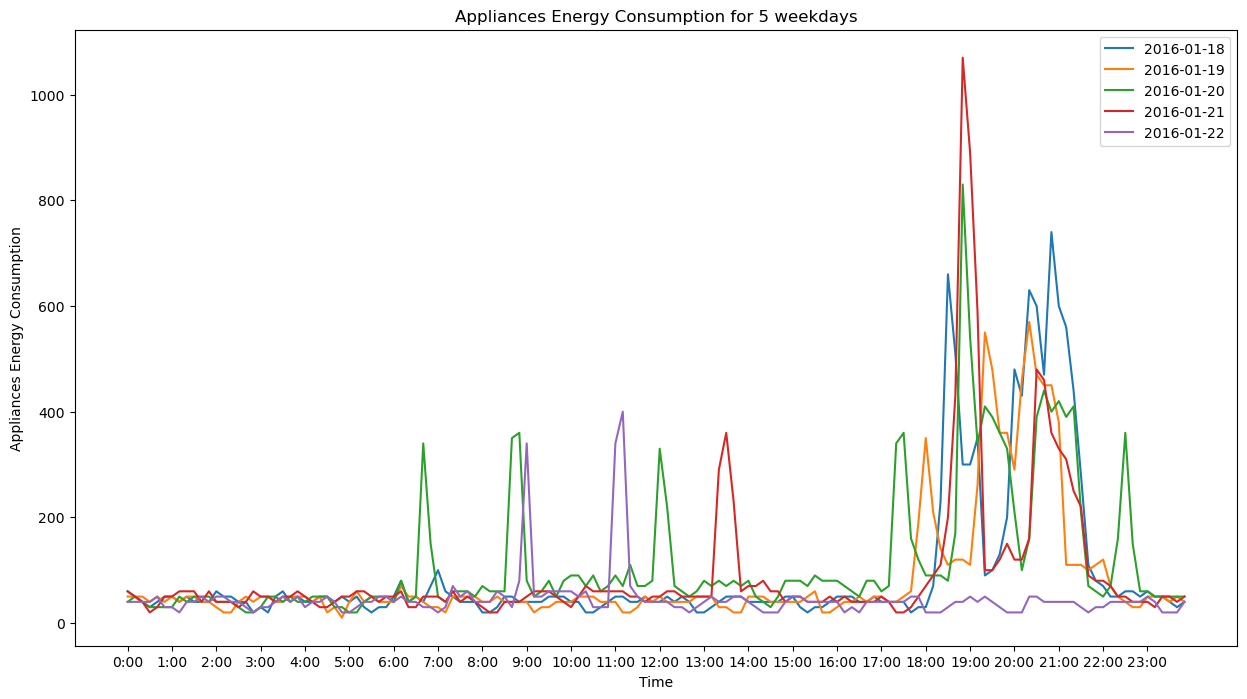

In [126]:
# show appliances energy consumption in 5 weekdays
energy_df = df[['Appliances']]

# Select the date range
start_date1 = '2016-01-18'
end_date1 = '2016-01-19'
mask1 = (energy_df.index >= start_date1) & (energy_df.index < end_date1)
df_day1 = energy_df.loc[mask1]

# Select the second day
start_date2 = '2016-01-19'
end_date2 = '2016-01-20'
mask2 = (energy_df.index >= start_date2) & (energy_df.index < end_date2)
df_day2 = energy_df.loc[mask2]

# Select the third day
start_date3 = '2016-01-20'
end_date3 = '2016-01-21'
mask3 = (energy_df.index >= start_date3) & (energy_df.index < end_date3)
df_day3 = energy_df.loc[mask3]

# Select the fourth day
start_date4 = '2016-01-21'
end_date4 = '2016-01-22'
mask4 = (energy_df.index >= start_date4) & (energy_df.index < end_date4)
df_day4 = energy_df.loc[mask4]

# Select the fifth day
start_date5 = '2016-01-22'
end_date5 = '2016-01-23'
mask5 = (energy_df.index >= start_date5) & (energy_df.index < end_date5)
df_day5 = energy_df.loc[mask5]

# Select the first day and only keep the time
df_day1.index = df_day1.index.time
df_day1['Appliances'].plot(kind='line', figsize=(15, 8), label='2016-01-18')

# Select the second day and only keep the time
df_day2.index = df_day2.index.time
df_day2['Appliances'].plot(kind='line', figsize=(15, 8), label='2016-01-19')

# Select the third day and only keep the time
df_day3.index = df_day3.index.time
df_day3['Appliances'].plot(kind='line', figsize=(15, 8), label='2016-01-20')

# Select the fourth day and only keep the time
df_day4.index = df_day4.index.time
df_day4['Appliances'].plot(kind='line', figsize=(15, 8), label='2016-01-21')

# Select the fifth day and only keep the time
df_day5.index = df_day5.index.time
df_day5['Appliances'].plot(kind='line', figsize=(15, 8), label='2016-01-22')

# Set xticks to every hour
plt.xticks([datetime.time(i) for i in range(24)], [str(i) + ':00' for i in range(24)])

plt.title('Appliances Energy Consumption for 5 weekdays')
plt.ylabel('Appliances Energy Consumption')
plt.xlabel('Time')
plt.legend()
plt.show()

From Monday to Thursday (2016.1.18-2016.1.21), There are common peaks appearing in the range [17:00, 22:00].  
While Friday didn't show this feature, because it's the start of weekends?

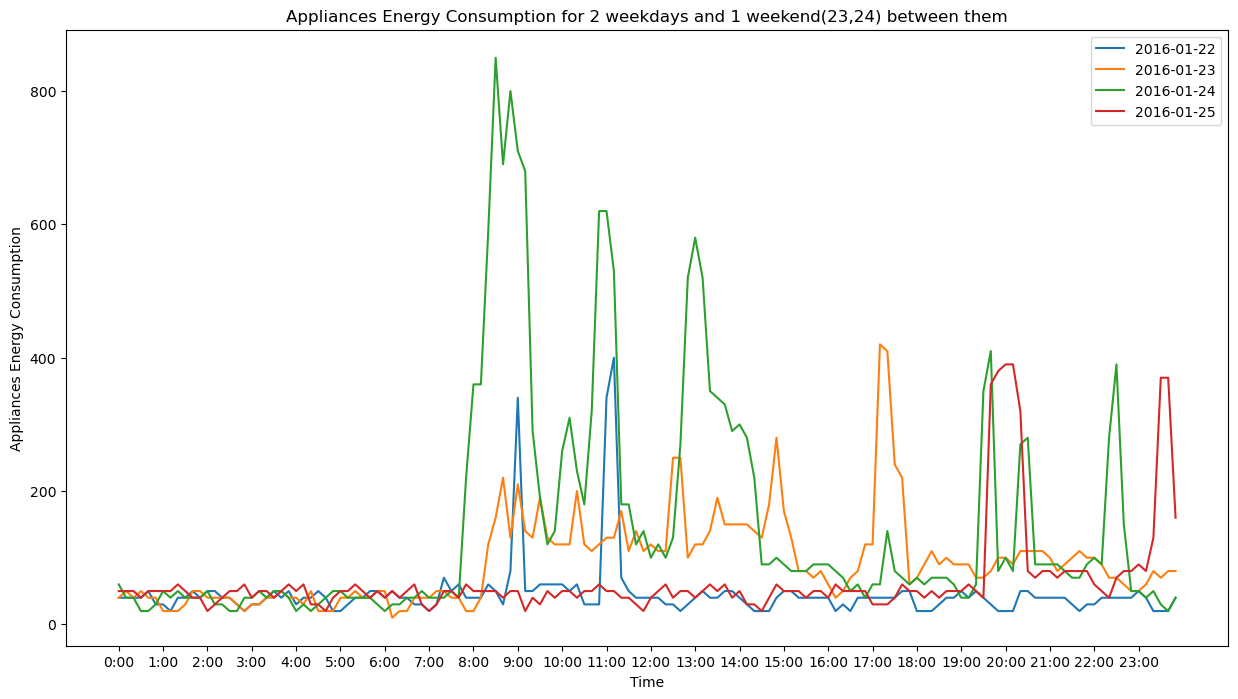

In [127]:
# show appliances energy consumption in 2 weekdays(22,25) and 1 weekend(23,24) between them
# Select the date range
start_date1 = '2016-01-22'
end_date1 = '2016-01-23'
mask1 = (energy_df.index >= start_date1) & (energy_df.index < end_date1)
df_day1 = energy_df.loc[mask1]

# Select the second day
start_date2 = '2016-01-23'
end_date2 = '2016-01-24'
mask2 = (energy_df.index >= start_date2) & (energy_df.index < end_date2)
df_day2 = energy_df.loc[mask2]

# Select the third day
start_date3 = '2016-01-24'
end_date3 = '2016-01-25'
mask3 = (energy_df.index >= start_date3) & (energy_df.index < end_date3)
df_day3 = energy_df.loc[mask3]

# Select the fourth day
start_date4 = '2016-01-25'
end_date4 = '2016-01-26'
mask4 = (energy_df.index >= start_date4) & (energy_df.index < end_date4)
df_day4 = energy_df.loc[mask4]

# Select the first day and only keep the time
df_day1.index = df_day1.index.time
df_day1['Appliances'].plot(kind='line', figsize=(15, 8), label='2016-01-22')

# Select the second day and only keep the time
df_day2.index = df_day2.index.time
df_day2['Appliances'].plot(kind='line', figsize=(15, 8), label='2016-01-23')

# Select the third day and only keep the time
df_day3.index = df_day3.index.time
df_day3['Appliances'].plot(kind='line', figsize=(15, 8), label='2016-01-24')

# Select the fourth day and only keep the time
df_day4.index = df_day4.index.time
df_day4['Appliances'].plot(kind='line', figsize=(15, 8), label='2016-01-25')

# Set xticks to every hour
plt.xticks([datetime.time(i) for i in range(24)], [str(i) + ':00' for i in range(24)])

plt.title('Appliances Energy Consumption for 2 weekdays and 1 weekend(23,24) between them')
plt.ylabel('Appliances Energy Consumption')
plt.xlabel('Time')
plt.legend()
plt.show()

Daytime nenrgy consumption on Sunday(green) is much higher than that of Monday(red).  
Still no useful patterns can be found now.

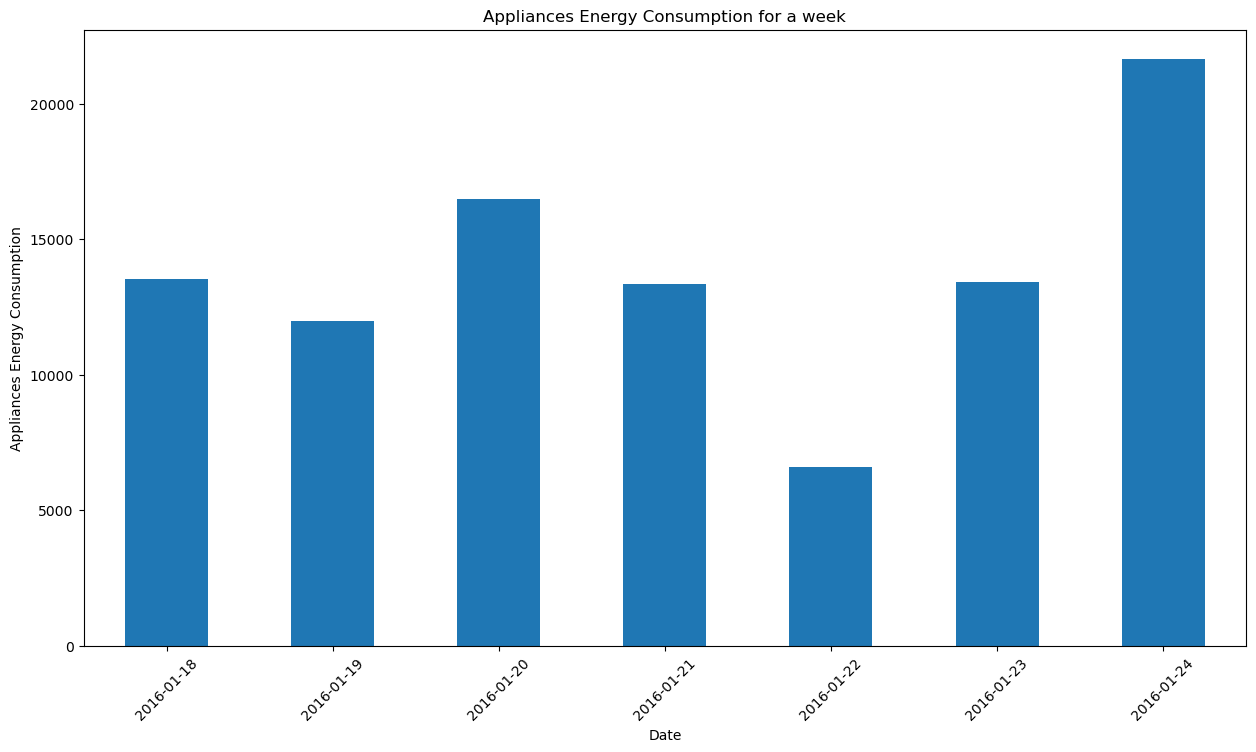

In [128]:
# weekly energy consumption
# Select the date range
start_date1 = '2016-01-18'
end_date1 = '2016-01-25'
mask1 = (energy_df.index >= start_date1) & (energy_df.index < end_date1)
df_week = energy_df.loc[mask1]

# Resample to daily frequency and sum
df_week_daily = df_week.resample('D').sum()

# show weekly energy consumption
df_week_daily.index = df_week_daily.index.date
df_week_daily['Appliances'].plot(kind='bar', figsize=(15, 8))

plt.title('Appliances Energy Consumption for a week')
plt.ylabel('Appliances Energy Consumption')
plt.xlabel('Date')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()
# Sunday is the highest energy consumption day

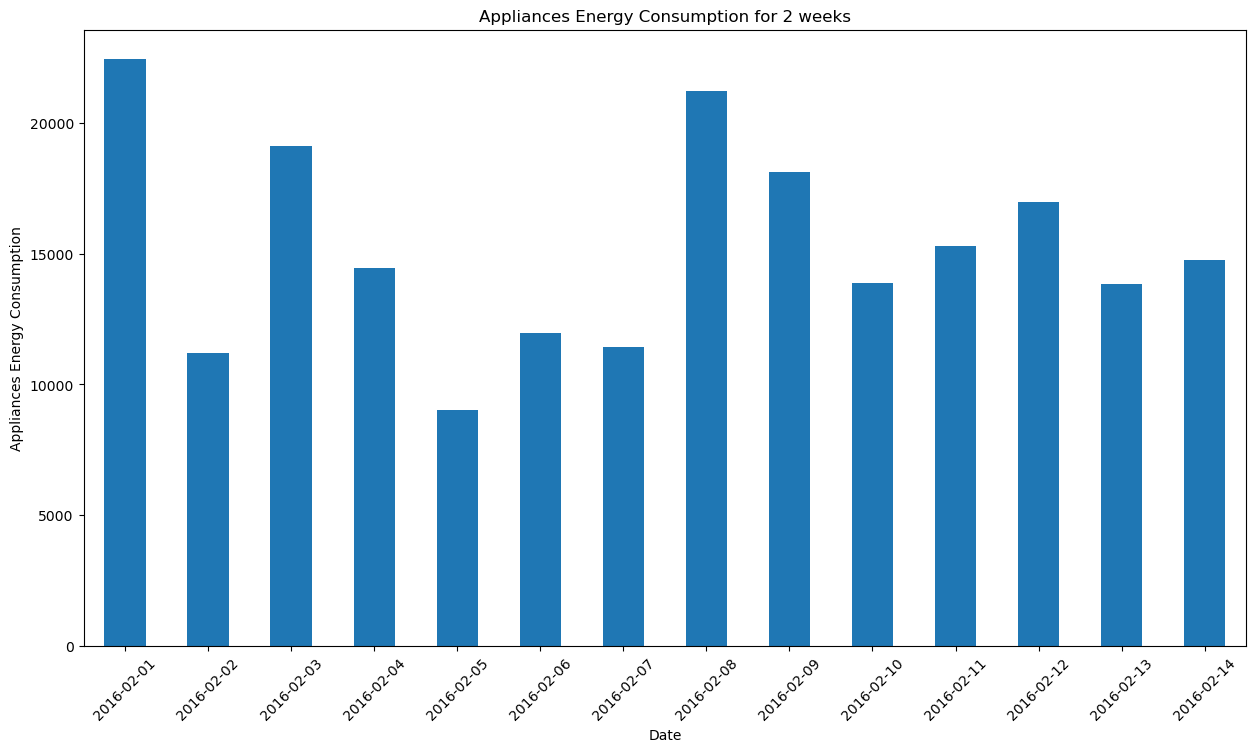

In [129]:
# 2 weeks energy consumption
# Select the date range
start_date1 = '2016-02-01'
end_date1 = '2016-02-15'
mask1 = (energy_df.index >= start_date1) & (energy_df.index < end_date1)
df_2weeks = energy_df.loc[mask1]

# Resample to daily frequency and sum
df_2weeks = df_2weeks.resample('D').sum()
# plot as line graph
df_2weeks.index = df_2weeks.index.date
df_2weeks['Appliances'].plot(kind='bar', figsize=(15, 8))

plt.title('Appliances Energy Consumption for 2 weeks')
plt.ylabel('Appliances Energy Consumption')
plt.xlabel('Date')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

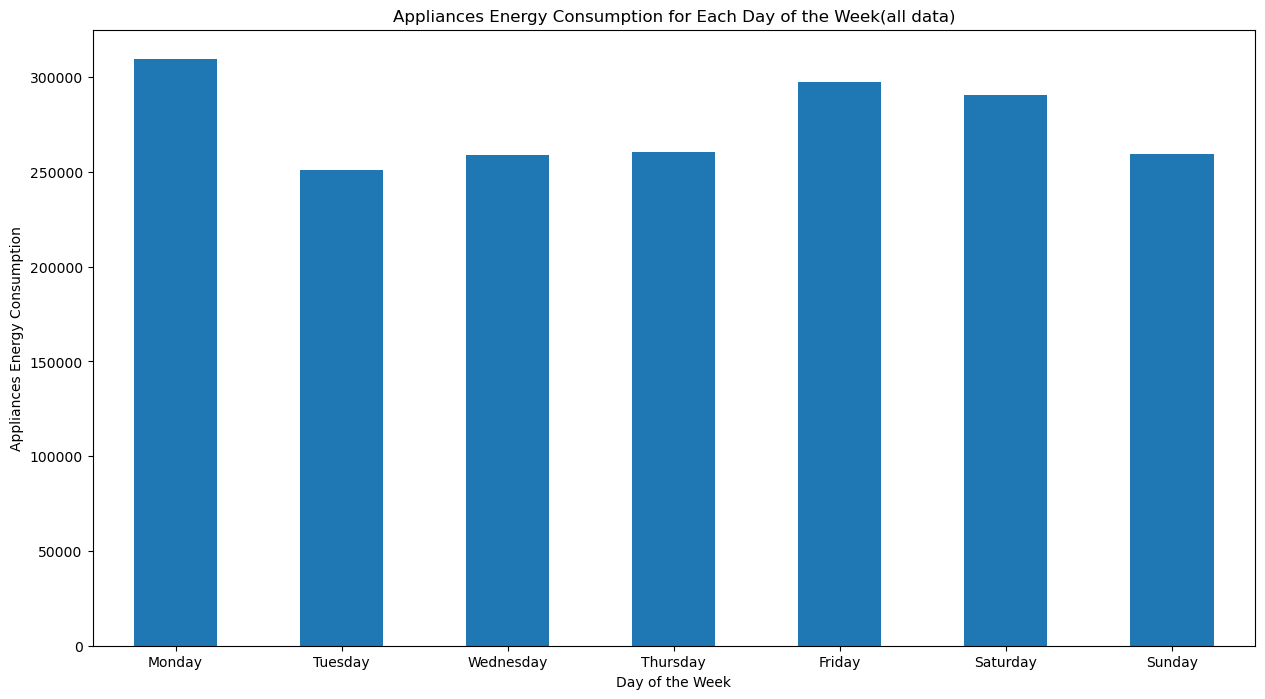

In [130]:
# Group by day of the week and sum
df_weekly = energy_df.groupby(energy_df.index.dayofweek).sum()

# Map the day of the week index to actual day names
days = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_weekly.index = df_weekly.index.map(days)

# Show weekly energy consumption
df_weekly['Appliances'].plot(kind='bar', figsize=(15, 8))

plt.title('Appliances Energy Consumption for Each Day of the Week(all data)')
plt.ylabel('Appliances Energy Consumption')
plt.xlabel('Day of the Week')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()
# Monday is the highest energy consumption day

Mondays' energy consumption is the highest.

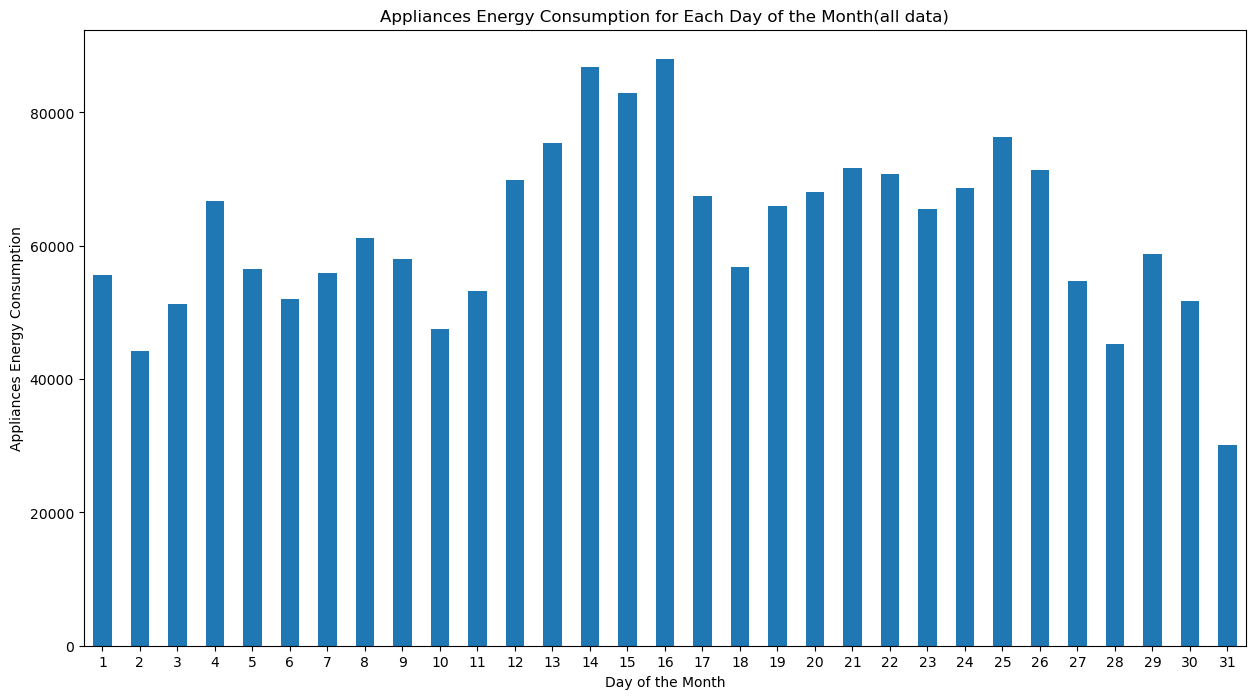

In [131]:
# Group by day of the month and sum
df_monthly = energy_df.groupby(energy_df.index.day).sum()

# Show monthly energy consumption
df_monthly['Appliances'].plot(kind='bar', figsize=(15, 8))

plt.title('Appliances Energy Consumption for Each Day of the Month(all data)')
plt.ylabel('Appliances Energy Consumption')
plt.xlabel('Day of the Month')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

14, 15, 16 of a month show the relatively higher energy consumption than other dates.

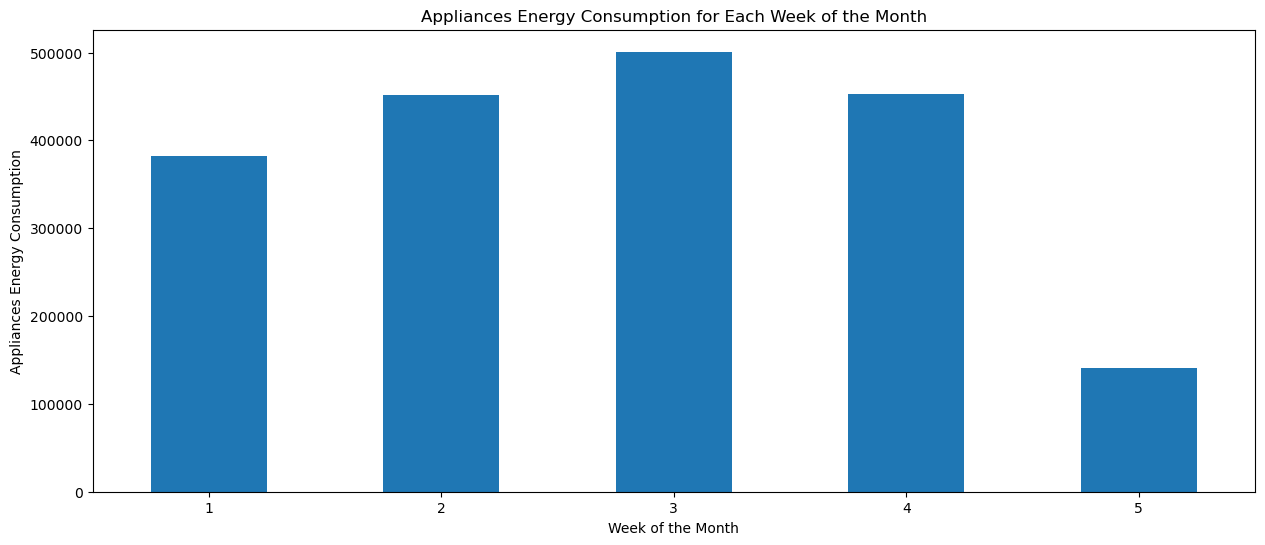

In [132]:
# Create a copy of the DataFrame
energy_df_copy = energy_df.copy()

# Create a new column for the week of the month
energy_df_copy['week_of_month'] = (energy_df_copy.index.day - 1) // 7 + 1

# Group by week of the month and sum
df_weekly = energy_df_copy.groupby('week_of_month').sum()

# Show weekly energy consumption
df_weekly['Appliances'].plot(kind='bar', figsize=(15, 6))

plt.title('Appliances Energy Consumption for Each Week of the Month')
plt.ylabel('Appliances Energy Consumption')
plt.xlabel('Week of the Month')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

The 3rd week of every month shows the highest consumption, because 14, 15, 16 of a month show the relatively higher energy consumption than other dates, and 15, 16 are in the range of 3rd week .

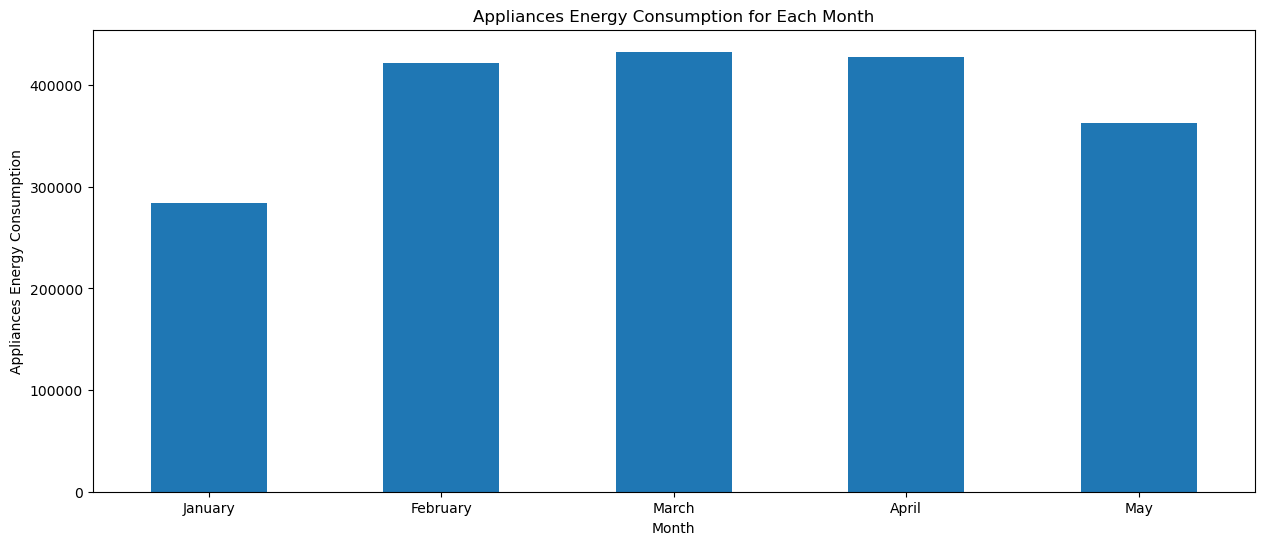

In [133]:
# Resample to monthly frequency and sum
df_monthly = energy_df.resample('M').sum()

# Format the index to only show the month name
df_monthly.index = df_monthly.index.strftime('%B')

# Show monthly energy consumption
df_monthly['Appliances'].plot(kind='bar', figsize=(15, 6))

plt.title('Appliances Energy Consumption for Each Month')
plt.ylabel('Appliances Energy Consumption')
plt.xlabel('Month')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

January and May's data are not complete because of the Date range: 2016-01-11 17:00:00 to 2016-05-27 18:00:00.  
February, March, and April are almost equal.

In [134]:
# analysis using linear regression

# reload data
df = pd.read_csv('energydata_complete.csv')
# convert date to datetime and set it as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
# df['date'] = df['date'].astype(int) // 10**9

# create dataframe withe Date and Appliances columns
data = df[['Appliances']].copy()

# Split the data into train and validation sets
train = data.iloc[:int(0.8*(len(data))), :]
valid = data.iloc[int(0.8*(len(data))):, :]

# extract features from Date column
# data['day'] = data.index.day
# data['month'] = data.index.month
# data['weekday'] = data.index.weekday
data['time'] = data.index.hour*60 + data.index.minute
# data['weekOfMonth'] = (data.index.day - 1) // 7 + 1

# create separate dataset for linear regression
lr_data = data.copy()

# sort dataset by date
lr_data.sort_index(inplace=True)

# create linear regression model
lr_model = LinearRegression()

lr_data.head()

Appliances  time
date                                 
2016-01-11 17:00:00          60  1020
2016-01-11 17:10:00          60  1030
2016-01-11 17:20:00          50  1040
2016-01-11 17:30:00          50  1050
2016-01-11 17:40:00          60  1060

In [135]:
len(lr_data)

19735

In [136]:
# fit linear regression model on train data
lr_model.fit(lr_data.iloc[:int(0.8*(len(lr_data))), 1:], lr_data.iloc[:int(0.8*(len(lr_data))), 0])

# make predictions on validation set
lr_pred = lr_model.predict(lr_data.iloc[int(0.8*(len(lr_data))):, 1:])

# calculate rmse
rmse = mean_squared_error(valid['Appliances'], lr_pred)
print(f'Linear Regression RMSE: {rmse}')

# create subplots for actual and predicted values
fig1 = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1)

# add actual and predicted values to the subplots
fig1.add_trace(go.Scatter(x=valid.index, y=valid['Appliances'], mode='lines', name='Actual'), row=1, col=1)
fig1.add_trace(go.Scatter(x=valid.index, y=lr_pred, mode='lines', name='Predicted'), row=1, col=1)

# update layout of the subplots
fig1.update_layout(height=600, width=1400, title_text="Linear Regression - Actual vs Predicted", xaxis_title='Date',)

fig1.show()
# There are 27 periods in the whole duration of the dataset, So I guess the seasonality is 138days/27=5.11, which is 5 days?

Linear Regression RMSE: 8089.263570833969


In [137]:
df.drop(['rv1', 'rv2'], axis=1, inplace=True)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9         

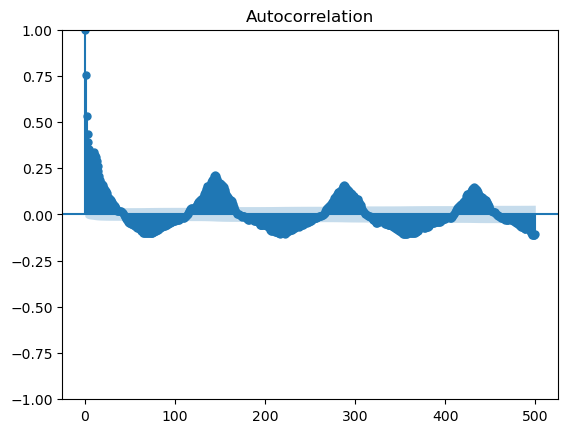

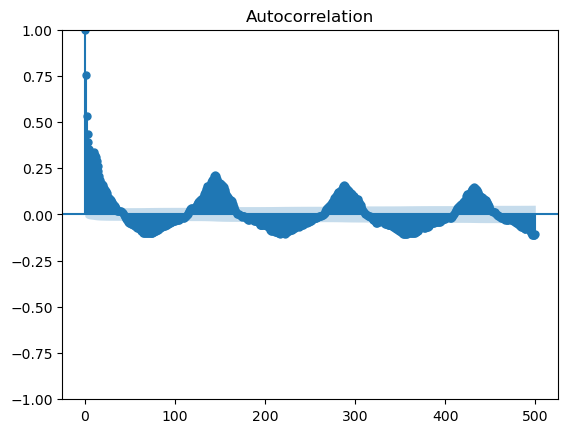

In [139]:
plot_acf(df.Appliances, lags=500)
# 3.5 peariods showing here, so seasonality could be 500/3.5 = 142.85 ≈ 143.
# 143lags*10min/60min = 23.83, which is about 24 hours!
# if I use 24 hours as the period, the seasonality is 24*6=144, which is close to 143

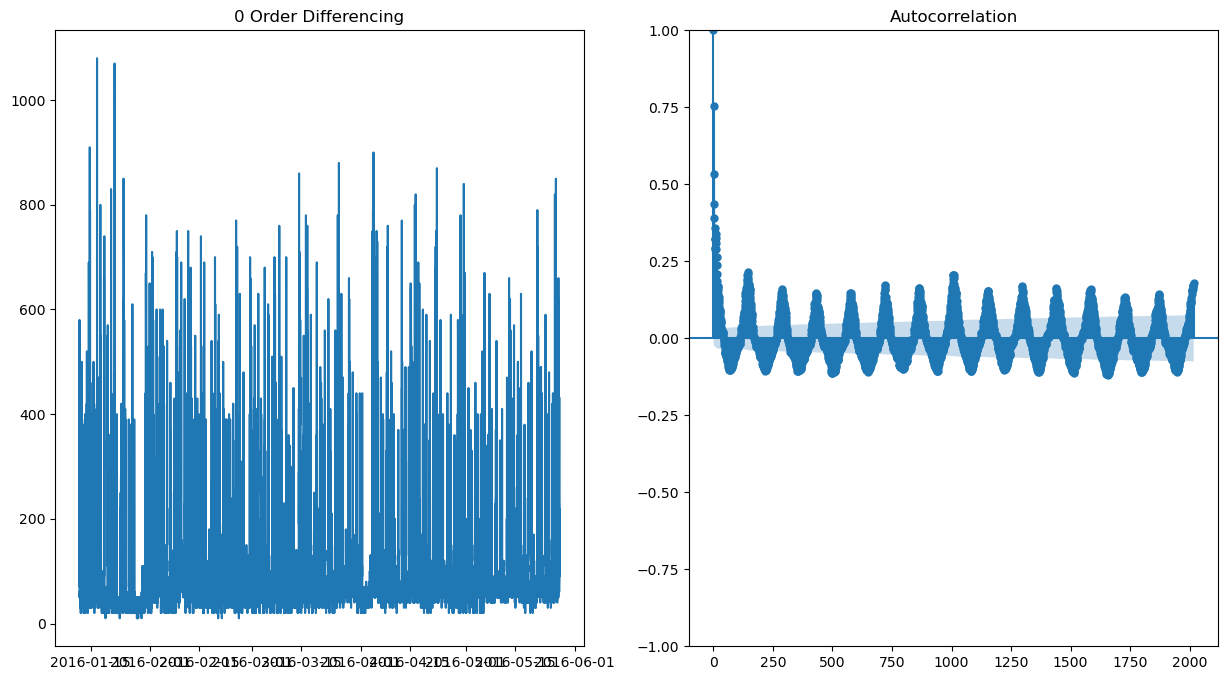

In [140]:
# 0 order differencing
f = plt.figure(figsize=(15, 8))
ax1 = f.add_subplot(121)
ax1.set_title('0 Order Differencing')
ax1.plot(df.Appliances)

ax2 = f.add_subplot(122)
plot_acf(df.Appliances.dropna(), ax=ax2, lags=2016)
plt.show()

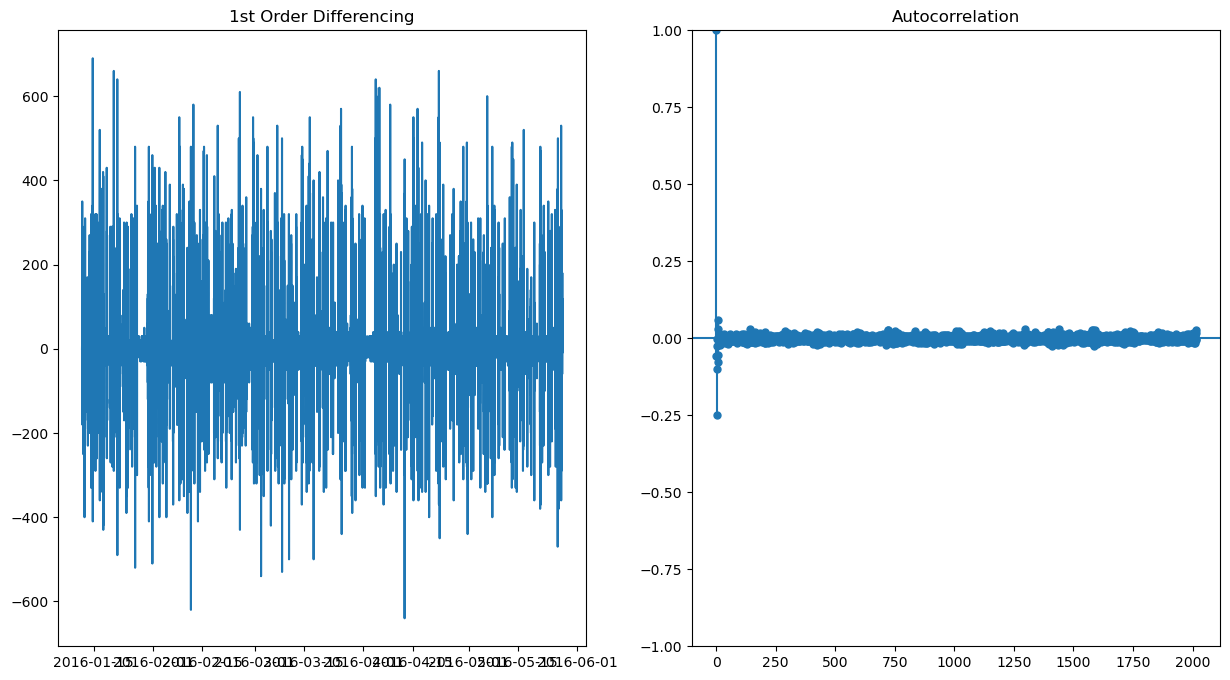

In [141]:
# first order differencing
f = plt.figure(figsize=(15, 8))
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(df.Appliances.diff())

ax2 = f.add_subplot(122)
plot_acf(df.Appliances.diff().dropna(), ax=ax2, lags=2016)
plt.show()

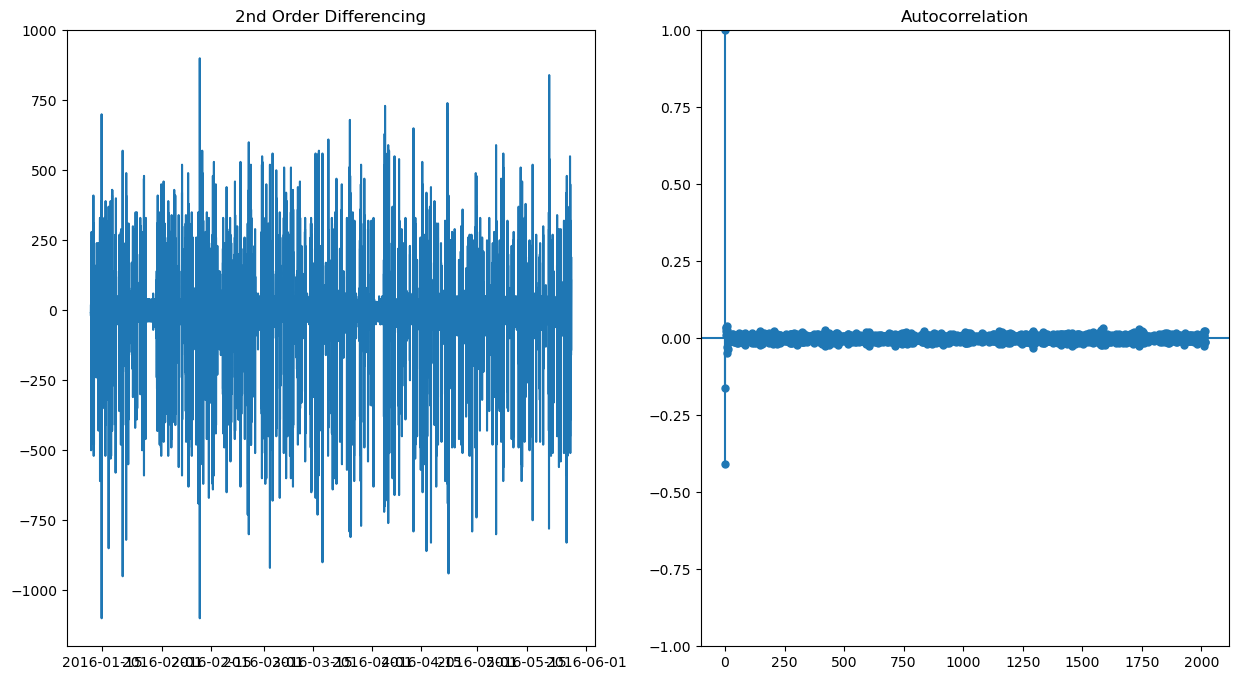

In [142]:
# second order differencing
f = plt.figure(figsize=(15, 8))
ax1 = f.add_subplot(121)
ax1.set_title('2nd Order Differencing')
ax1.plot(df.Appliances.diff().diff())

ax2 = f.add_subplot(122)
plot_acf(df.Appliances.diff().diff().dropna(), ax=ax2, lags=2016)
plt.show()

The parameter 'd' could be 1. should be better than 2, which seems over-differenced.

Calculate the p-value and compares it with a threshold value or significance level of 0.05. If the p-value is less than this level, then the data is stationary; else, the differencing order is incremented by one

In [143]:
# Augmented Dickey-Fuller test
result = adfuller(df.Appliances.dropna())
print('p-value: ', result[1])

result = adfuller(df.Appliances.diff().dropna())
print('p-value: ', result[1])

result = adfuller(df.Appliances.diff().diff().dropna())
print('p-value: ', result[1])
# seems 1st order differencing is enough. p-value is less than 0.05
# 0 order also statisfied the p-value, but the ACF plot is not good

p-value:  0.0
p-value:  0.0
p-value:  0.0


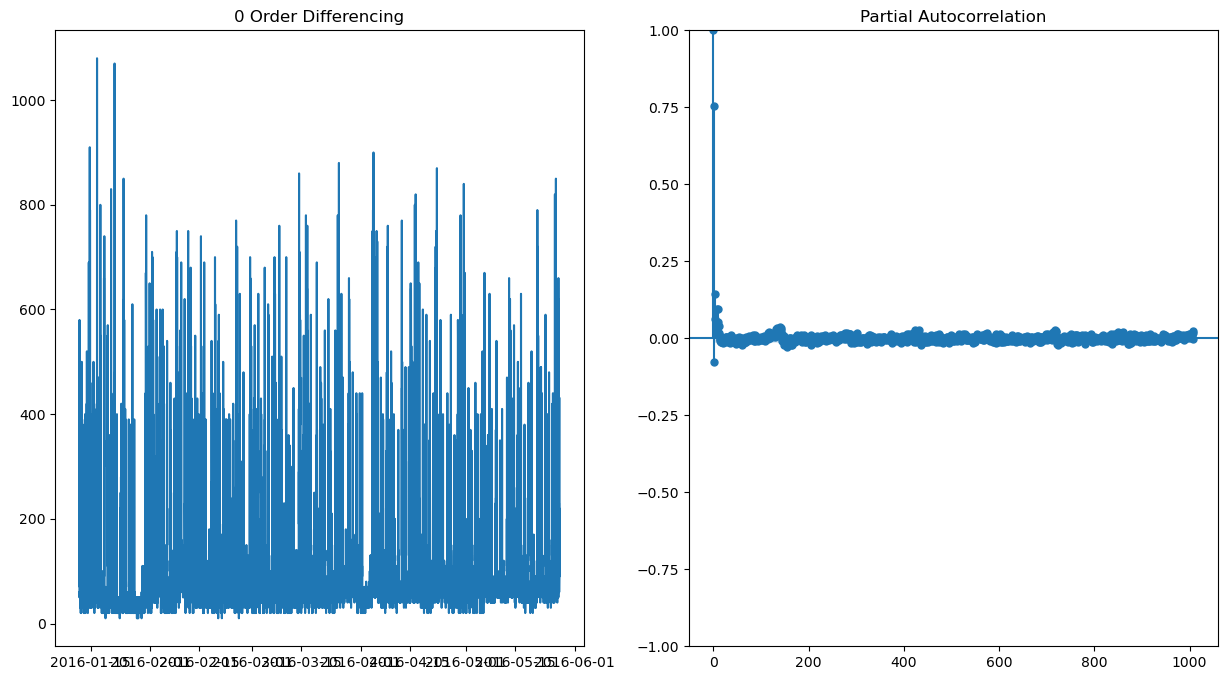

In [144]:
# partial autocorrelation
f = plt.figure(figsize=(15, 8))
ax1 = f.add_subplot(121)
ax1.set_title('0 Order Differencing')
ax1.plot(df.Appliances)

ax2 = f.add_subplot(122)
plot_pacf(df.Appliances.dropna(), ax=ax2, lags=1008)
plt.show()

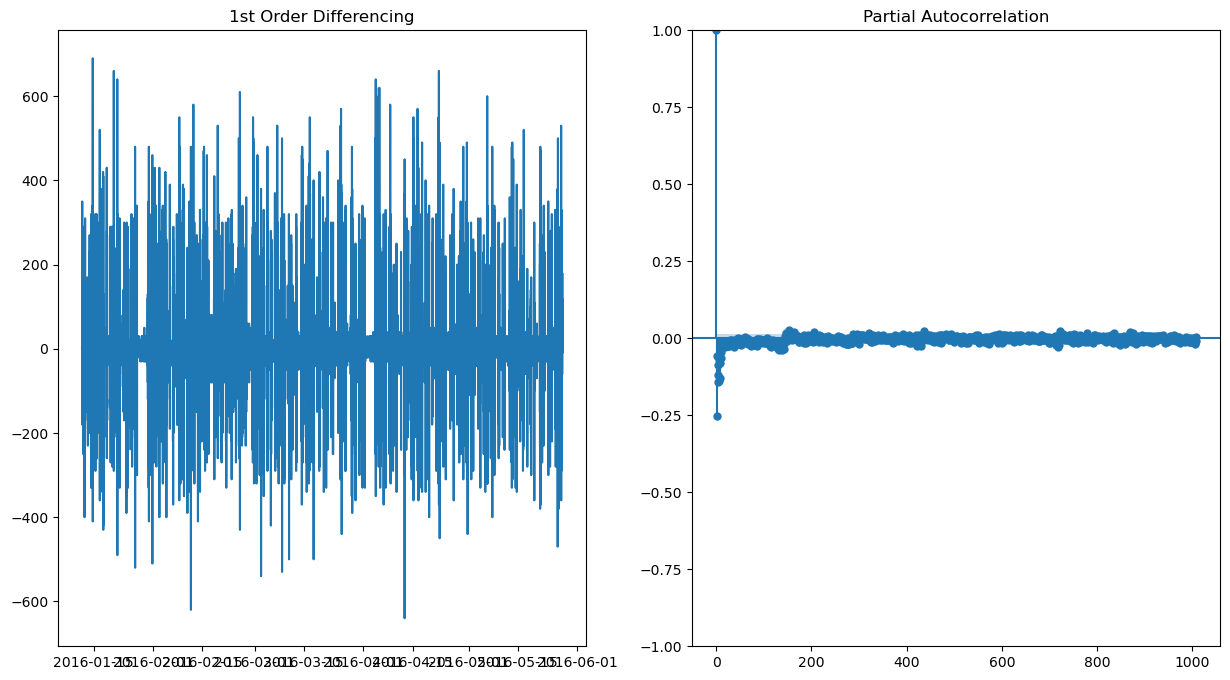

In [145]:
# partial autocorrelation
f = plt.figure(figsize=(15, 8))
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(df.Appliances.diff())

ax2 = f.add_subplot(122)
plot_pacf(df.Appliances.diff().dropna(), ax=ax2, lags=1008)
plt.show()

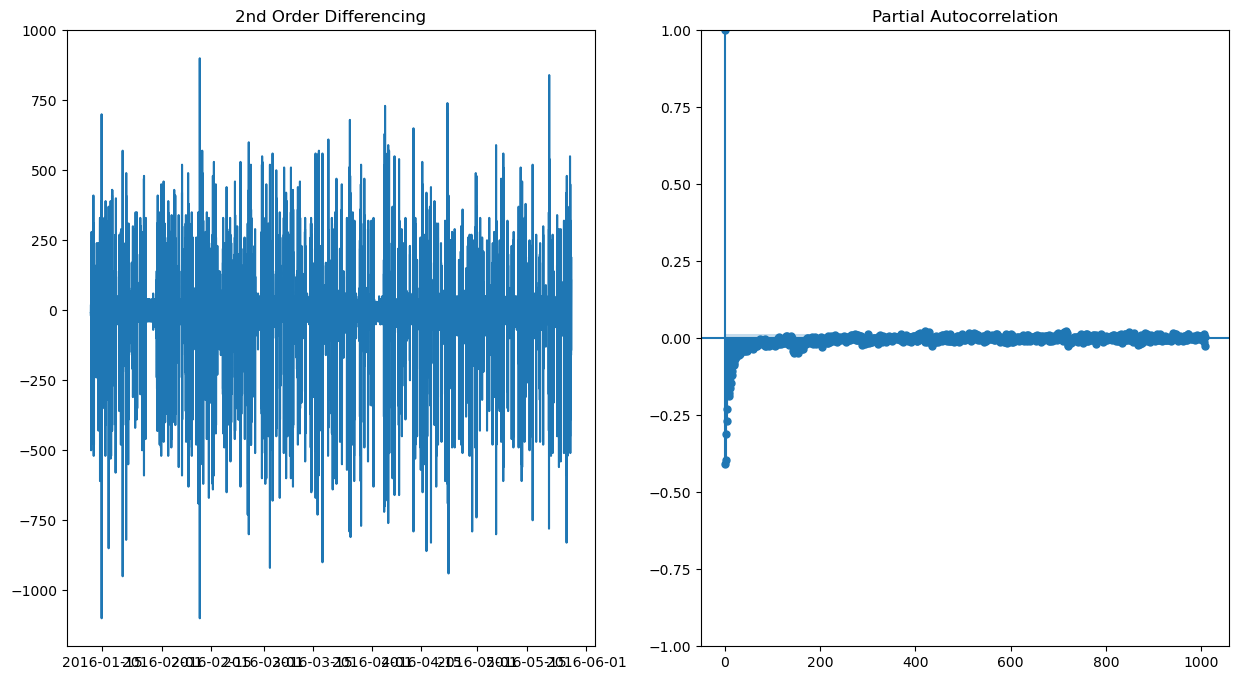

In [146]:
# partial autocorrelation
f = plt.figure(figsize=(15, 8))
ax1 = f.add_subplot(121)
ax1.set_title('2nd Order Differencing')
ax1.plot(df.Appliances.diff().diff())

ax2 = f.add_subplot(122)
plot_pacf(df.Appliances.diff().diff().dropna(), ax=ax2, lags=1008)
plt.show()

By comparison of partial autocorrelation plots, 1st order differencing is more stationary.  
And I assume the (p,d,q) values are (0,1,2). I will chcek it by comparing with auto_arima model.

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9         

In [148]:
# only leave data at hh:10:00 and hh:40:00
df = df[df.index.minute.isin([10, 40])]
df = df[['Appliances']]
df.head(10)

Appliances
date                           
2016-01-11 17:10:00          60
2016-01-11 17:40:00          60
2016-01-11 18:10:00          60
2016-01-11 18:40:00         230
2016-01-11 19:10:00         250
2016-01-11 19:40:00          90
2016-01-11 20:10:00         140
2016-01-11 20:40:00         110
2016-01-11 21:10:00         110
2016-01-11 21:40:00         100

In [149]:
# take a sample data of 2 weeks
data_2weeks = df['2016-02-01':'2016-02-14']


In [150]:
# use atuoarima to decide p,d,q
# try to find the best parameters for 2-week data
auto_arima(data_2weeks, start_p=0, start_q=1,
                          max_p=3, max_q=3, m=48,
                          seasonal=True,
                          d=1, D=1, trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)

Performing stepwise search to minimize aic


 ARIMA(0,1,1)(1,1,1)[48]             : AIC=inf, Time=30.75 sec
 ARIMA(0,1,0)(0,1,0)[48]             : AIC=8206.812, Time=1.81 sec
 ARIMA(1,1,0)(1,1,0)[48]             : AIC=7859.787, Time=4.40 sec
 ARIMA(0,1,1)(0,1,1)[48]             : AIC=inf, Time=13.56 sec
 ARIMA(1,1,0)(0,1,0)[48]             : AIC=8023.748, Time=0.46 sec
 ARIMA(1,1,0)(2,1,0)[48]             : AIC=inf, Time=18.55 sec
 ARIMA(1,1,0)(1,1,1)[48]             : AIC=inf, Time=17.96 sec
 ARIMA(1,1,0)(0,1,1)[48]             : AIC=inf, Time=21.83 sec
 ARIMA(1,1,0)(2,1,1)[48]             : AIC=inf, Time=65.69 sec
 ARIMA(0,1,0)(1,1,0)[48]             : AIC=8034.397, Time=6.12 sec
 ARIMA(2,1,0)(1,1,0)[48]             : AIC=7775.852, Time=10.48 sec
 ARIMA(2,1,0)(0,1,0)[48]             : AIC=7942.394, Time=0.90 sec
 ARIMA(2,1,0)(2,1,0)[48]             : AIC=inf, Time=32.28 sec
 ARIMA(2,1,0)(1,1,1)[48]             : AIC=inf, Time=29.90 sec
 ARIMA(2,1,0)(0,1,1)[48]             : AIC=inf, Time=37.50 sec
 ARIMA(2,1,0)(2,1,1)[48]      

ARIMA(order=(3, 1, 0), scoring_args={}, seasonal_order=(1, 1, 0, 48),
      suppress_warnings=True, with_intercept=False)

Therefore, parameters should be (1, 1, 0)[48]

In [151]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6578 entries, 2016-01-11 17:10:00 to 2016-05-27 17:40:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Appliances  6578 non-null   int64
dtypes: int64(1)
memory usage: 360.8 KB
None


### 3. Implement prediction models

In [152]:
# reload data
df = pd.read_csv('energydata_complete.csv')

# convert date to datetime and set it as index
df = df[['date', 'Appliances']]
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# pick non-numerical columns
non_numeric_cols = df.select_dtypes(exclude=[np.number])
non_numeric_cols.head()

Empty DataFrame
Columns: []
Index: [2016-01-11 17:00:00, 2016-01-11 17:10:00, 2016-01-11 17:20:00, 2016-01-11 17:30:00, 2016-01-11 17:40:00]

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Appliances  19735 non-null  int64
dtypes: int64(1)
memory usage: 308.4 KB


#### Naïve

Forecast MSE: 5187.711563798521


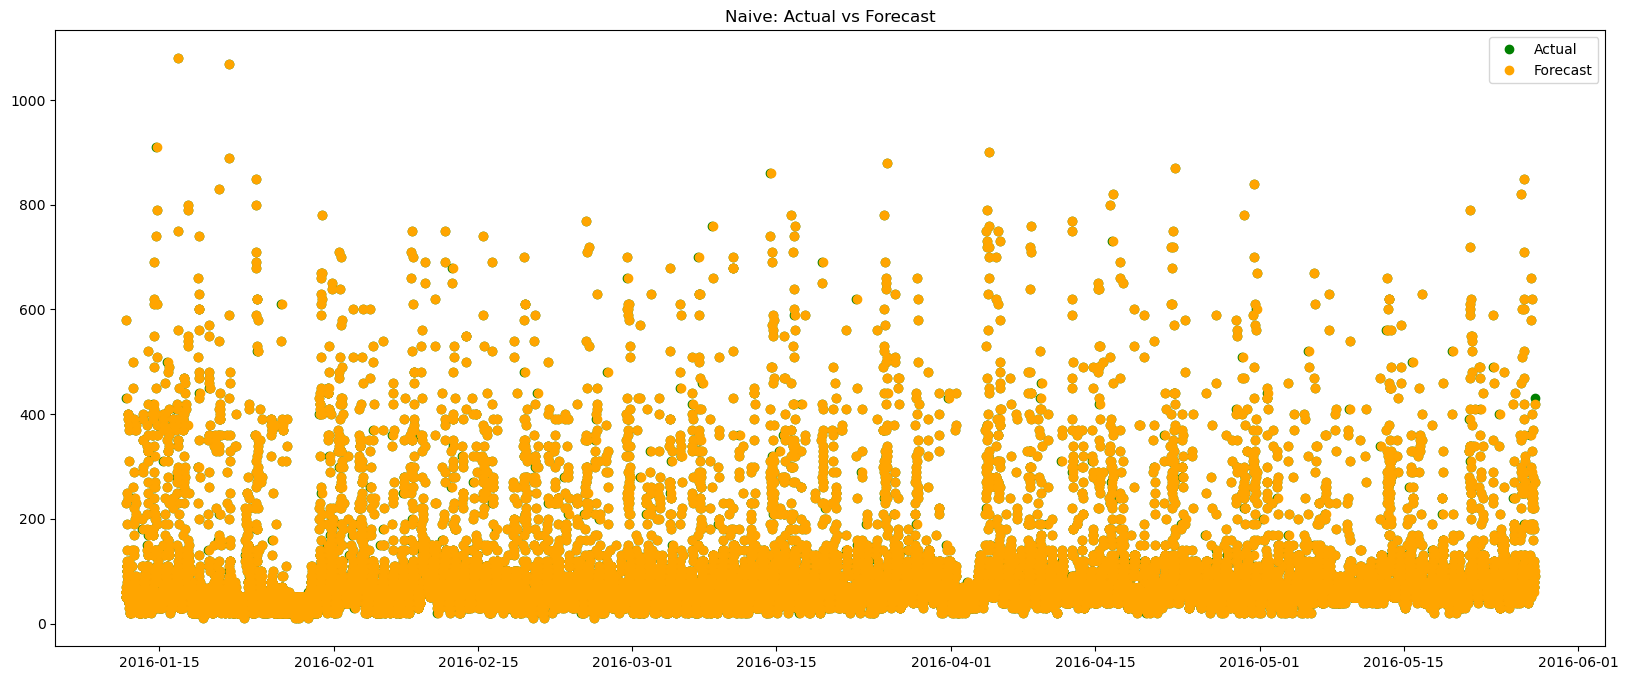

In [154]:
# Shift the 'Appliances' column by 1 to create the lag 1 forecast
df['Forecast_1'] = df['Appliances'].shift(1)

# Drop the missing values created by the shift
df = df.dropna()

# Calculate the mean squared error of the forecast
mse_navie = mean_squared_error(df['Appliances'], df['Forecast_1'])
print(f'Forecast MSE: {mse_navie}')

# Plot the actual values and the forecast
plt.figure(figsize=(20, 8))
plt.plot(df['Appliances'], 'o', color='green', label='Actual')
plt.plot(df['Forecast_1'], 'o', color='orange', label='Forecast')
plt.title("Naive: Actual vs Forecast")
plt.legend()
plt.show()
# The forecast is not accurate. MSE is high

Naive method needs no training. It predicts the value for each time step from the observed value at the previous time step.  
It seems this Naive method can predict the Appliances value well because you see the orange dots can cover almost all green dots.  
However, the mean squared error is bigger than 5000, too high!

#### Seasonal(monthly?weekly?daily?) naïve method

Now, the problem is how long the season length is? It can't be 24hrs because of the difference between weekdays and weekends. Friday can't represent Saturday, and Sunday can't represent Monday.  
Can it be 1 week? My guess is No because as we see before, 14, 15, 16 generally have higher energy consumption than other days in the same month, which makes the 3rd week's value higher than other weeks in the same month.  
Since we don't have data of two seasons, we only have one suitable choice of season: 1 month.

Forecast MSE: 16430.80653394589


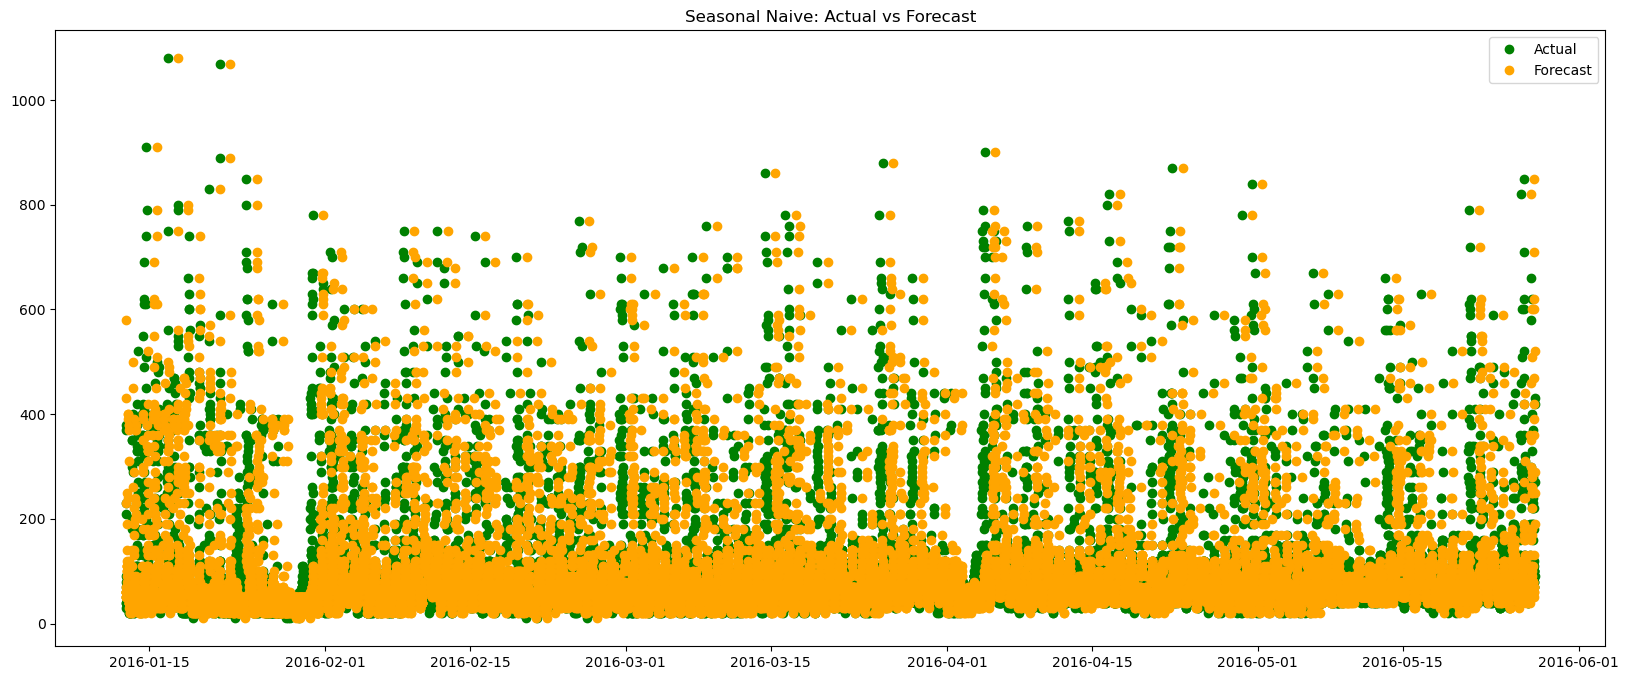

In [155]:
# Define the season length: 1 month(Assuming an average of 30 days in a month)
# 24hrs *60mins/10 = 144
season_length = 144

# Create the seasonal naive forecast
df['Forecast_2'] = df['Appliances'].shift(season_length)

# Drop the missing values created by the shift
# here I lost the first 144 rows of data, because of the shift. What a waste!
df = df.dropna()

# Calculate the mean squared error of the forecast
mse_seasonal = mean_squared_error(df['Appliances'], df['Forecast_2'])
print(f'Forecast MSE: {mse_seasonal}')

# Plot the actual values and the forecast
plt.figure(figsize=(20, 8))
plt.plot(df['Appliances'], 'o', color='green', label='Actual')
plt.plot(df['Forecast_2'], 'o', color='orange', label='Forecast')
plt.title("Seasonal Naive: Actual vs Forecast")
plt.legend()
plt.show()

This is even worse than simple naive method. The mean squared error is bigger than **16000**.  
I guess the reason is the date range of our data is 2016-01-11 17:00:00 to 2016-05-27 18:00:00.  
February has 29 days, while March has 31 days and April has 30 days. January and May's data is also not complete.  
Therefore, seasonal naïve method is not a good method for this data.

#### ARIMA

In [160]:
df.head()

Appliances  Forecast_1  Forecast_2
date                                                   
2016-01-12 17:10:00          60        60.0        60.0
2016-01-12 17:20:00         210        60.0        50.0
2016-01-12 17:30:00         380       210.0        50.0
2016-01-12 17:40:00         370       380.0        60.0
2016-01-12 17:50:00         230       370.0        50.0

In [163]:
arima_data = df[df.index.minute.isin([10, 40])][['Appliances']].copy().asfreq('30T') # 30 minutes frequency
# Define the model order
seasonal_order = (1, 1, 0, 48)

# split data into train and validation sets
train = arima_data.iloc[:int(0.8*len(arima_data)), :]
valid = arima_data.iloc[int(0.8*len(arima_data)):, :]

In [170]:
train.head()

Appliances
date                           
2016-01-12 17:10:00          60
2016-01-12 17:40:00         370
2016-01-12 18:10:00          90
2016-01-12 18:40:00          40
2016-01-12 19:10:00          50

### 4. Train prediction models

#### ARIMA

In [165]:
# fit ARIMA model
arima_model = ARIMA(train, seasonal_order=seasonal_order)
model = arima_model.fit()
# Calculate the standard deviation of the innovations
std_dev_innovations = model.resid.std()
print(f'Standard Deviation of Innovations: {std_dev_innovations}')
print(model.summary())

Standard Deviation of Innovations: 116.58424700125887
                               SARIMAX Results                                
Dep. Variable:             Appliances   No. Observations:                 5224
Model:             ARIMA(1, 1, 0, 48)   Log Likelihood              -31974.027
Date:                Sun, 05 May 2024   AIC                          63952.054
Time:                        17:08:41   BIC                          63965.157
Sample:                    01-12-2016   HQIC                         63956.638
                         - 04-30-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L48      -0.4740      0.007    -71.613      0.000      -0.487      -0.461
sigma2      1.356e+04    119.595    113.342      0.000    1.33e+04    1.38e+0

### 5. Test prediction models and show results

#### ARIMA

Mean Squared Error: 14222.323408178117


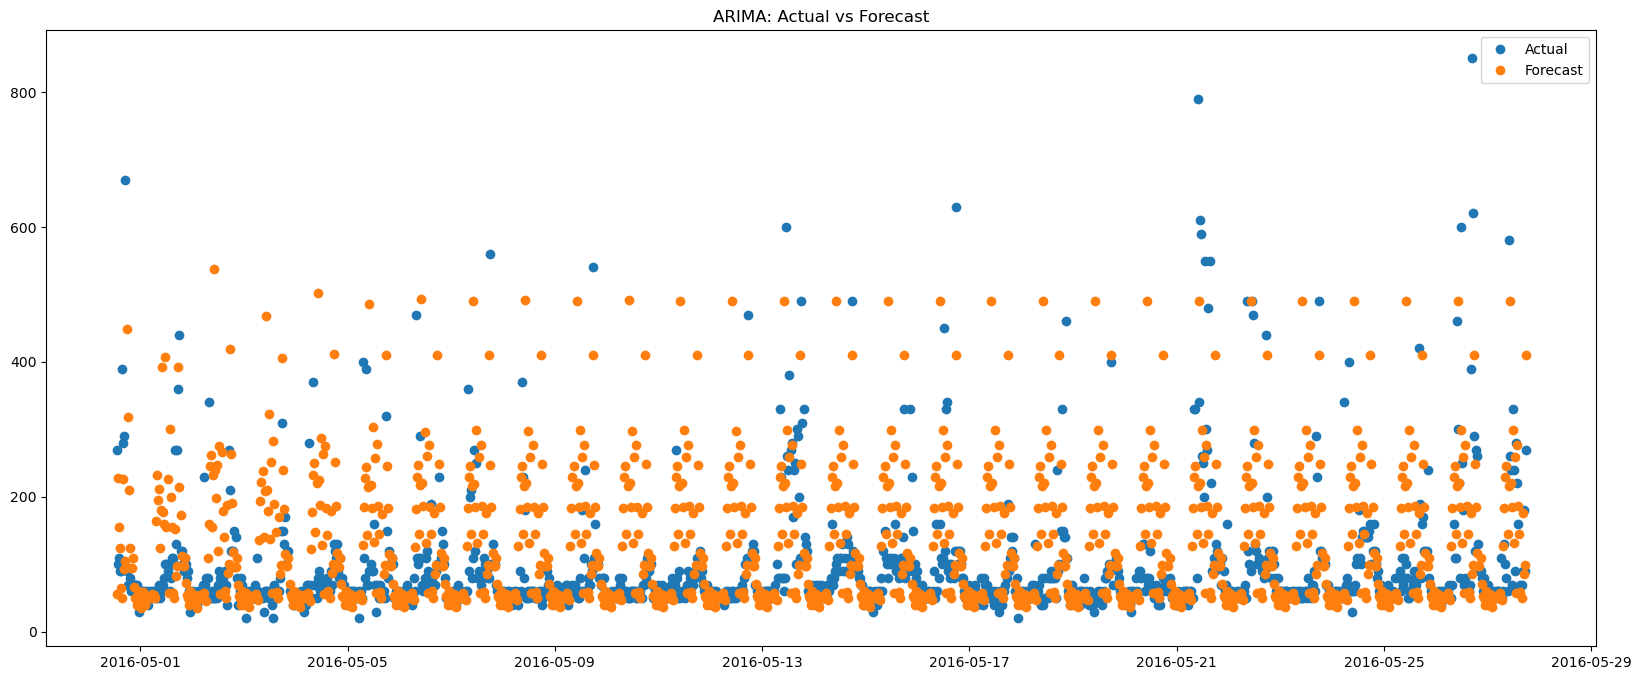

In [247]:
# Make predictions
start = len(train)
end = len(train) + len(valid) - 1
forecast = model.predict(start=start, end=end)

# Calculate the mean squared error
mse_arima = mean_squared_error(valid['Appliances'], forecast)
print(f'Mean Squared Error: {mse_arima}')

# Plot the actual values and the forecast
plt.figure(figsize=(20, 8))
# plt.plot(train['Appliances'], label='Train')
plt.plot(valid['Appliances'], 'o', label='Actual')
plt.plot(forecast, 'o', label='Forecast')
plt.title('ARIMA: Actual vs Forecast')
plt.legend()
plt.show()

In [234]:
forecast = forecast.to_frame('Appliances')

### 6. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results

Compare the results from all candidate models, choose the best model, justify your choice and discuss the results.

In [246]:
# create subplots for actual and predicted values
fig = make_subplots(rows=1, cols=1, shared_xaxes=True, vertical_spacing=0.1)

# add actual and predicted values to the subplots
fig.add_trace(go.Scatter(x=valid.index, y=valid['Appliances'], name='Actual'), row=1, col=1)
fig.add_trace(go.Scatter(x=valid.index, y=forecast['Appliances'], name='ARIMA'), row=1, col=1)
fig.add_trace(go.Scatter(x=valid.index, y=df['Forecast_1'], name='naïve'), row=1, col=1)
fig.add_trace(go.Scatter(x=valid.index, y=df['Forecast_2'], name='seasonal naïve'), row=1, col=1)

# update layout of the subplots
fig.update_layout(height=600, width=1400, title_text="Actual vs Forecast", xaxis_title='Date',)

fig.show()
# you can click the legend to hide some lines or show them

In [248]:
print('Mean Squared Error:')
print(f'naïve: {mse_navie}')
print(f'seasonal naïve: {mse_seasonal}')
print(f'ARIMA: {mse_arima}')

Mean Squared Error:
naïve: 5187.711563798521
seasonal naïve: 16430.80653394589
ARIMA: 14222.323408178117


These mean squared error values show that naïve is the best model in those 3 models.  
However, I have to confess that I might not use ARIMA correctly because when I was running auto_arima it takes very long time. Usually, either the python kernal died or my compuer shut down at the end. So I have to pick part of data from original dataframe.  
And the p, d, q paramters that determine the precision of the final model is not absolutely accurate, in my opinion.  
The seasonality/period, I think, should have been a month, but in that scenario my computer will run the training part forever.  
To get a result for this assignment and learn something from it, I have to pick a day as the m, so that I can get a model as soon as possble.

### 7. Reflect on what you have learned by completing this assignment

Some fancy algorithms or models are robust and useful, but it becomes very annoying when they run continuously and nonstop.  
The computing power of my laptop is also important. Maybe algorithms like ARIMA need to be improved in their speed in the future.
I admit I made some seemingly useless analysis at the beginning, but they did give some insights about the raw data.

### 8. References

Blog: https://www.projectpro.io/article/how-to-build-arima-model-in-python/544#mcetoc_1fp23v670d  
YouTube: https://www.youtube.com/watch?v=-aCF0_wfVwY&ab_channel=LianneandJustin;   
        https://www.youtube.com/watch?v=TNmI9v49mlM&ab_channel=TheDataFutureLab  
pmdarima: https://alkaline-ml.com/pmdarima/tips_and_tricks.html#period  